# Reproduce all our experiments with only one file ✨
This is a fast visualization of most of the results in our paper. Read our paper for more details.

## Evaluation on SCOPe40-test

### Preprocess

In [1]:
%%bash
cd ./plmsearch_data/scope_test/
# Generate rocx
methods=("3dblastsw" "clesw" "dalialn" "cealn" "blastp" "hhblits" "eat" "plm_blast" "foldseek_default" "foldseek" "foldseek_tm" "mmseqs2_default" "mmseqs2" "tmaln_default" "tmaln_avg_score" "tmaln" "euclidean" "cos" "ss_predictor" "plmsearch" "plmalign_plmsearch")

for method in "${methods[@]}"; do
    ./bench_roc.awk ./scop_lookup.tsv <(cat ./search_result/${method}) > ./rocx/${method}.rocx
    sort -k3,3 -gr ./search_result/${method} > ./prx/sorted_search_result/${method}
    ./bench_pr.awk ./scop_lookup.tsv <(cat ./prx/sorted_search_result/${method}) > ./prx/${method}.prx
done
cd ../..

### AUROC

In [2]:
%%bash
cd ./plmsearch_data/scope_test/
# Generate rocx
methods=("mmseqs2" "blastp" "hhblits" "eat" "plm_blast" "foldseek" "foldseek_tm" "tmaln" "ss_predictor" "plmsearch" "plmalign_plmsearch")

for method in "${methods[@]}"; do
    echo "Processing method: $method"
    ### The area under the curve (AUC) of the cumulative ROC curve up to the first FP
    awk '{ famsum+=$3; supfamsum+=$4; foldsum+=$5}END{print famsum/NR,supfamsum/NR,foldsum/NR}' ./rocx/${method}.rocx
    ### The average num of Family TPs, Superfamily TPs, Fold TPs, total TPs up to the first FP
    awk '{ FamTP+=$10; SFamTP+=$11; FoldTP+=$12; TP+=$10; TP+=$11; TP+=$12}END{print FamTP/NR, SFamTP/NR, FoldTP/NR, TP/NR}' ./rocx/${method}.rocx
done
cd ../..


Processing method: mmseqs2
0.318421 0.0507028 0.00292006
2.206 0.516297 0.0247718 2.74707
Processing method: blastp
0.527044 0.161951 0.00490198
4.39113 1.21382 0.0547588 5.65971
Processing method: hhblits


0.92072 0.363134 0.0644976
9.10561 11.2581 3.92699 24.2907
Processing method: eat
0.648009 0.230843 0.0253926
6.17992 6.12516 1.6558 13.9609
Processing method: plm_blast
0.940748 0.642737 0.176003
8.96741 30.5789 13.9544 53.5007
Processing method: foldseek
0.883598 0.584344 0.214083
8.57366 28.3364 14.1917 51.1017
Processing method: foldseek_tm
0.898516 0.66496 0.296947
8.68709 34.6258 20.7979 64.1108
Processing method: tmaln
0.9355 0.721375 0.346205
9.29726 38.5776 24.8318 72.7066
Processing method: ss_predictor
0.869695 0.623761 0.225981
8.78227 34.8892 20.6219 64.2934
Processing method: plmsearch
0.928461 0.826972 0.438417
9.32334 47.4407 48.0156 104.78
Processing method: plmalign_plmsearch
0.933983 0.787343 0.342157
9.11213 41.5098 32.0743 82.6962


### ROC & PR curve

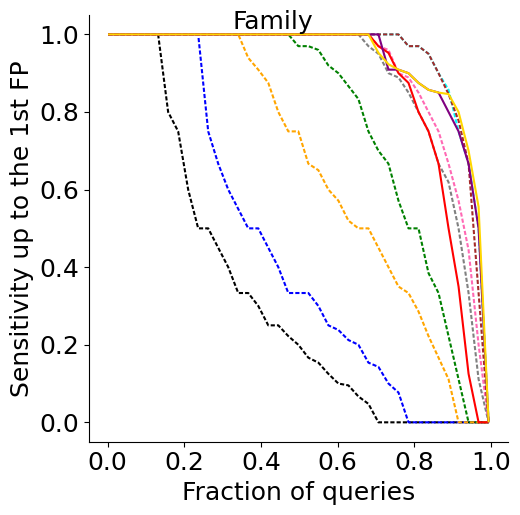

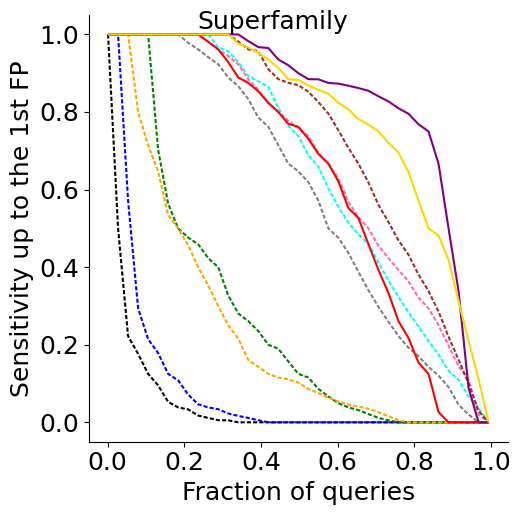

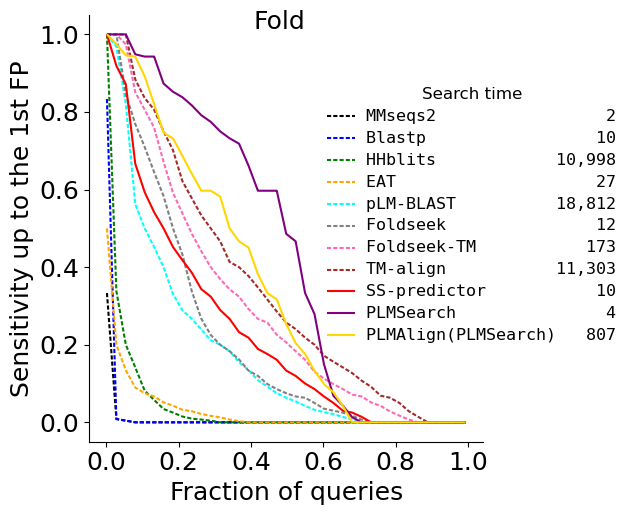

AUPR for MMseqs2             (Family): 0.4306558780105
AUPR for Blastp              (Family): 0.7173258768545
AUPR for HHblits             (Family): 0.969485359123
AUPR for EAT                 (Family): 0.6465955447612999
AUPR for pLM-BLAST           (Family): 0.9731289842280498
AUPR for Foldseek            (Family): 0.9216823816435
AUPR for Foldseek-TM         (Family): 0.906342770718
AUPR for TM-align            (Family): 0.97139461992105
AUPR for SS-predictor        (Family): 0.8910530389679001
AUPR for PLMSearch           (Family): 0.9310338048688
AUPR for PLMAlign(PLMSearch) (Family): 0.9568151068159999


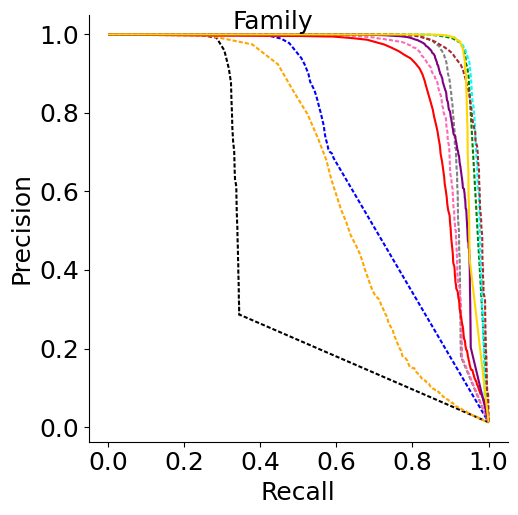

AUPR for MMseqs2             (Superfamily): 0.09116947131197001
AUPR for Blastp              (Superfamily): 0.34213436547425
AUPR for HHblits             (Superfamily): 0.6231545830755
AUPR for EAT                 (Superfamily): 0.22561975020846994
AUPR for pLM-BLAST           (Superfamily): 0.77957182389135
AUPR for Foldseek            (Superfamily): 0.7038487970805
AUPR for Foldseek-TM         (Superfamily): 0.6954070194388
AUPR for TM-align            (Superfamily): 0.8662706986678499
AUPR for SS-predictor        (Superfamily): 0.713049393835015
AUPR for PLMSearch           (Superfamily): 0.849445995032355
AUPR for PLMAlign(PLMSearch) (Superfamily): 0.88750657271


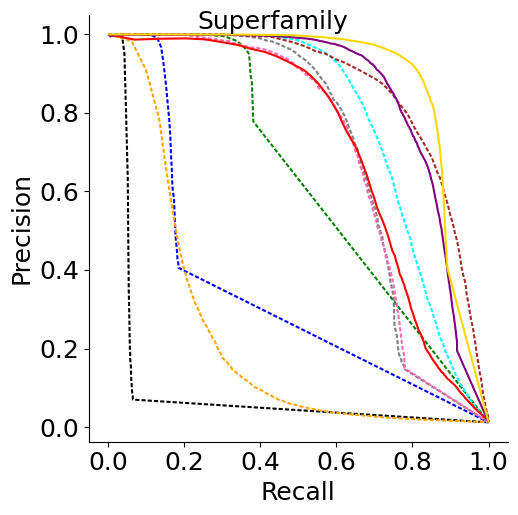

AUPR for MMseqs2             (Fold): 0.014699037189821
AUPR for Blastp              (Fold): 0.029886070875235003
AUPR for HHblits             (Fold): 0.2560610537968
AUPR for EAT                 (Fold): 0.0209008651078582
AUPR for pLM-BLAST           (Fold): 0.30588673234589997
AUPR for Foldseek            (Fold): 0.32016287059099996
AUPR for Foldseek-TM         (Fold): 0.33772082937155
AUPR for TM-align            (Fold): 0.56917338174165
AUPR for SS-predictor        (Fold): 0.32446175410940753
AUPR for PLMSearch           (Fold): 0.47340775815267405
AUPR for PLMAlign(PLMSearch) (Fold): 0.5219468358895


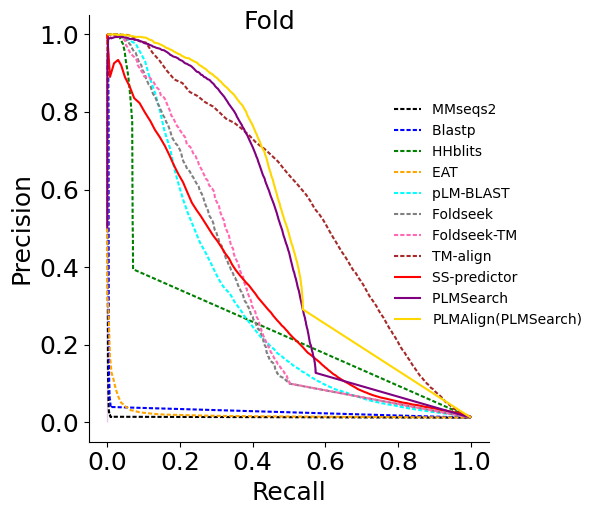

In [10]:
from plmsearch.plmsearch_util.statistics_util import scop_roc, scop_pr

methods_name_list = ["MMseqs2", "Blastp", "HHblits", "EAT", "pLM-BLAST", "Foldseek", "Foldseek-TM", "TM-align", "SS-predictor", "PLMSearch", "PLMAlign(PLMSearch)"]
line_style = [(2,1), (2,1), (2,1), (2,1), (2,1), (2,1), (2,1), (2,1), (1,0), (1,0), (1,0)]
color_dict = {
    "MMseqs2": "black",
    "Blastp": "blue",
    "HHblits": "green",
    "EAT": "orange",
    "pLM-BLAST": "cyan",
    "Foldseek": "gray",
    "Foldseek-TM": "#FF69B4",
    "TM-align": "brown",
    "SS-predictor": "red",
    "PLMSearch": "purple",
    "PLMAlign(PLMSearch)": "gold"
}

time_dict = {
    "MMseqs2": '2',
    "Blastp": '10',
    "HHblits": '10,998',
    "EAT": '27',
    "pLM-BLAST": '18,812',
    "Foldseek": '12',
    "Foldseek-TM": '173',
    "TM-align": '11,303',
    "SS-predictor": '10',
    "PLMSearch": '4',
    "PLMAlign(PLMSearch)": '807'
}
# Find the maximum length of method names
max_length = max(len(method) for method in methods_name_list)
# Generate the formatted list
formatted_list = [f"{method.ljust(max_length)}{time_dict[method].rjust(6)}" for method in methods_name_list]
alnresult_dir = "./plmsearch_data/scope_test/rocx/"
methods_filename_list = ["mmseqs2.rocx", "blastp.rocx", "hhblits.rocx", "eat.rocx", "plm_blast.rocx", "foldseek.rocx", "foldseek_tm.rocx", "tmaln.rocx", "ss_predictor.rocx", "plmsearch.rocx", "plmalign_plmsearch.rocx"]
scop_roc(alnresult_dir, methods_filename_list, formatted_list, line_style, color_dict, time=True)

# All-versus-all search on SCOPe40-test
formatted_list = [f"{method.ljust(max_length)}" for method in methods_name_list]
alnresult_dir = "./plmsearch_data/scope_test/prx/"
methods_filename_list = ["mmseqs2.prx", "blastp.prx", "hhblits.prx", "eat.prx", "plm_blast.prx", "foldseek.prx", "foldseek_tm.prx", "tmaln.prx", "ss_predictor.prx", "plmsearch.prx", "plmalign_plmsearch.prx"]
scop_pr(alnresult_dir, methods_filename_list, formatted_list, line_style, color_dict, time=False)

### MAP & P@K on all protein and new protein

Get search list without self: 53886it [00:00, 145426.19it/s]
100%|██████████| 51679/51679 [00:00<00:00, 850556.17it/s]


MAP of MMseqs2:0.14763650587730087
P@1 of MMseqs2:0.6683280471227911
P@10 of MMseqs2:0.2608971454463088


Get search list without self: 29534it [00:00, 171595.91it/s]
100%|██████████| 27327/27327 [00:00<00:00, 683705.43it/s]


MAP of Blastp:0.18359553283874513
P@1 of Blastp:0.7177163570457635
P@10 of Blastp:0.354553692795652


Get search list without self: 49720it [00:00, 170496.54it/s]
100%|██████████| 47280/47280 [00:00<00:00, 841341.40it/s]


MAP of HHblits:0.320247192540529
P@1 of HHblits:0.8586316266425011
P@10 of HHblits:0.5777526053466242


Get search list without self: 4765489it [00:32, 148397.62it/s]
100%|██████████| 4763306/4763306 [00:04<00:00, 1183359.24it/s]


MAP of EAT:0.3509043045557305
P@1 of EAT:0.8133212505663797
P@10 of EAT:0.5758495695514283


Get search list without self: 4870849it [00:35, 137659.68it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1329338.61it/s]


MAP of pLM-BLAST:0.6594849518957107
P@1 of pLM-BLAST:0.9211599456275487
P@10 of pLM-BLAST:0.7608518350702311


Get search list without self: 396632it [00:02, 164065.86it/s]
100%|██████████| 394434/394434 [00:00<00:00, 1249540.10it/s]


MAP of Foldseek:0.5980508605255894
P@1 of Foldseek:0.9089261440869959
P@10 of Foldseek:0.7519256909832353


Get search list without self: 396632it [00:02, 159849.76it/s]
100%|██████████| 394434/394434 [00:00<00:00, 1248266.37it/s]


MAP of Foldseek-TM:0.6264157549479306
P@1 of Foldseek-TM:0.9053013140009062
P@10 of Foldseek-TM:0.7564567285908471


Get search list without self: 4870849it [00:36, 135101.96it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1299983.00it/s]


MAP of TM-align:0.7810308406028499
P@1 of TM-align:0.9410965111010421
P@10 of TM-align:0.8062981422745811


Get search list without self: 4870849it [00:38, 128150.20it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1245099.36it/s]


MAP of SS-predictor:0.6014074091216032
P@1 of SS-predictor:0.8219302220208428
P@10 of SS-predictor:0.6869053013140024


Get search list without self: 800221it [00:05, 135129.66it/s]
100%|██████████| 798014/798014 [00:01<00:00, 750884.47it/s]


MAP of PLMSearch:0.6853687207752468
P@1 of PLMSearch:0.9220661531490711
P@10 of PLMSearch:0.765518803806071


Get search list without self: 379707it [00:02, 136949.46it/s]
100%|██████████| 377500/377500 [00:00<00:00, 1219108.25it/s]


MAP of PLMAlign(PLMSearch):0.660958402207964
P@1 of PLMAlign(PLMSearch):0.9288627095604893
P@10 of PLMAlign(PLMSearch):0.7634345265065691


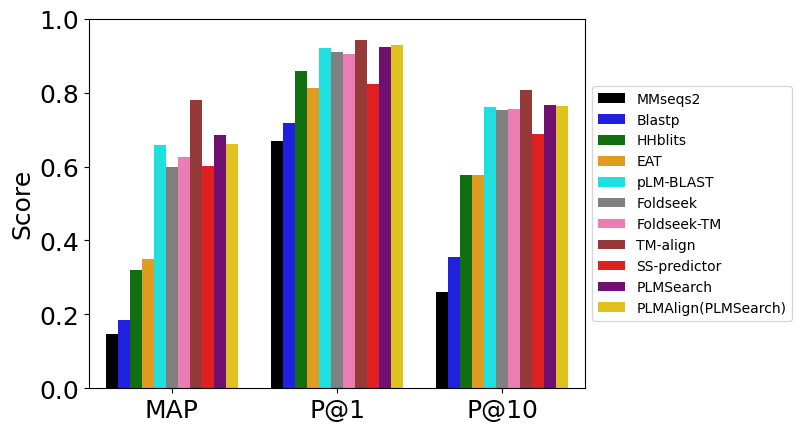

############# Experiment on new proteins #############
Total count of new proteins: 110


Get search list without self: 53886it [00:00, 176537.37it/s]
100%|██████████| 51679/51679 [00:00<00:00, 546561.22it/s]


MAP of MMseqs2:0.10708915065277799
P@1 of MMseqs2:0.5181818181818182
P@10 of MMseqs2:0.14999999999999997


Get search list without self: 29534it [00:00, 172326.14it/s]
100%|██████████| 27327/27327 [00:00<00:00, 613401.47it/s]


MAP of Blastp:0.1327880302763326
P@1 of Blastp:0.5909090909090909
P@10 of Blastp:0.270909090909091


Get search list without self: 49720it [00:00, 113545.04it/s]
100%|██████████| 47280/47280 [00:00<00:00, 803293.65it/s]


MAP of HHblits:0.279753731202463
P@1 of HHblits:0.8727272727272727
P@10 of HHblits:0.5818181818181818


Get search list without self: 4765489it [00:34, 139672.51it/s]
100%|██████████| 4763306/4763306 [00:03<00:00, 1210954.42it/s]


MAP of EAT:0.3151363790940056
P@1 of EAT:0.7909090909090909
P@10 of EAT:0.5763636363636365


Get search list without self: 4870849it [00:34, 141004.65it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1327275.65it/s]


MAP of pLM-BLAST:0.682377458477718
P@1 of pLM-BLAST:0.9363636363636364
P@10 of pLM-BLAST:0.8054545454545456


Get search list without self: 396632it [00:02, 136351.87it/s]
100%|██████████| 394434/394434 [00:00<00:00, 887833.28it/s]


MAP of Foldseek:0.5217396519191617
P@1 of Foldseek:0.8636363636363636
P@10 of Foldseek:0.7300000000000001


Get search list without self: 396632it [00:02, 154139.64it/s]
100%|██████████| 394434/394434 [00:00<00:00, 1229375.01it/s]


MAP of Foldseek-TM:0.5602368441642848
P@1 of Foldseek-TM:0.8818181818181818
P@10 of Foldseek-TM:0.7400000000000002


Get search list without self: 4870849it [00:35, 136743.97it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1251224.05it/s]


MAP of TM-align:0.7760204150056287
P@1 of TM-align:0.9454545454545454
P@10 of TM-align:0.8263636363636365


Get search list without self: 4870849it [00:36, 132825.68it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1346752.34it/s]


MAP of SS-predictor:0.6129093942493895
P@1 of SS-predictor:0.8454545454545455
P@10 of SS-predictor:0.7127272727272728


Get search list without self: 800221it [00:06, 130733.20it/s]
100%|██████████| 798014/798014 [00:00<00:00, 1336448.27it/s]


MAP of PLMSearch:0.6129093942493895
P@1 of PLMSearch:0.8454545454545455
P@10 of PLMSearch:0.7127272727272728


Get search list without self: 379707it [00:02, 127860.06it/s]
100%|██████████| 377500/377500 [00:00<00:00, 985920.43it/s] 


MAP of PLMAlign(PLMSearch):0.6795533437951042
P@1 of PLMAlign(PLMSearch):0.9272727272727272
P@10 of PLMAlign(PLMSearch):0.801818181818182


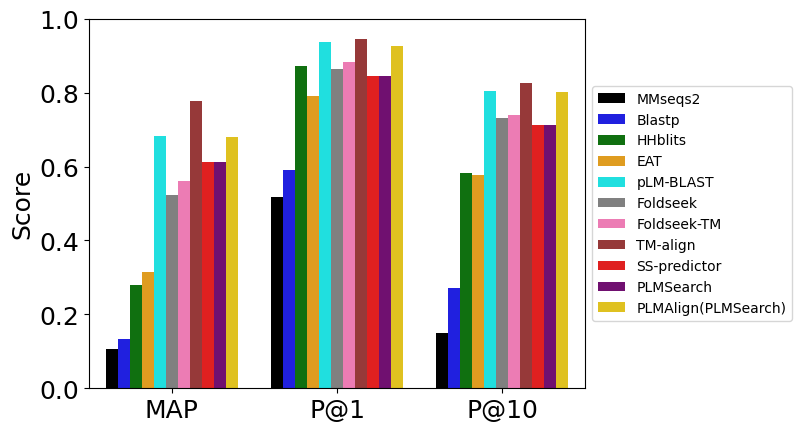

In [4]:
import json
from plmsearch.plmsearch_util.statistics_util import get_input_output, map_pk, map_pk_plot

todo_name_list = [
    "mmseqs2", 
    "blastp",
    "hhblits",
    "eat",
    "plm_blast",
    "foldseek",
    "foldseek_tm",
    "tmaln",
    "ss_predictor",
    "plmsearch",
    "plmalign_plmsearch"
]
color_dict = {
    "MMseqs2": "black",
    "Blastp": "blue",
    "HHblits": "green",
    "EAT": "orange",
    "pLM-BLAST": "cyan",
    "Foldseek": "gray",
    "Foldseek-TM": "#FF69B4",
    "TM-align": "brown",
    "SS-predictor": "red",
    "PLMSearch": "purple",
    "PLMAlign(PLMSearch)": "gold"
}
method_list = ["MMseqs2", "Blastp", "HHblits", "EAT", "pLM-BLAST", "Foldseek", "Foldseek-TM", "TM-align", "SS-predictor", "PLMSearch", "PLMAlign(PLMSearch)"]

todo_dir_list = ["./plmsearch_data/scope_test/search_result/"]
same_fold_mat = "./plmsearch_data/scope_test/same_fold_mat.npy"
query_protein_fasta_path = "./plmsearch_data/scope_test/protein.fasta"
target_protein_fasta_path = "./plmsearch_data/scope_test/protein.fasta"
todo_file_list, _ = get_input_output(todo_dir_list, todo_name_list)
k_list = [1,10]

# All query protein
df_dict_1 = map_pk(same_fold_mat, query_protein_fasta_path, target_protein_fasta_path, todo_file_list, method_list, k_list)
map_pk_plot(df_dict_1, color_dict, legend=True)

# New query protein (without pfam result)
special_protein_list = []
with open("./plmsearch_data/scope_test/pfam_result.json", 'r') as pfam_json_f:
    pfam_result = json.load(pfam_json_f)

for protein_id, pfam_data in pfam_result.items():
    if not pfam_data:
        special_protein_list.append(protein_id)
print(f"############# Experiment on new proteins #############")
print(f"Total count of new proteins: {len(special_protein_list)}")
df_dict_2 = map_pk(same_fold_mat, query_protein_fasta_path, target_protein_fasta_path, todo_file_list, method_list, k_list, special_protein_list=special_protein_list)
map_pk_plot(df_dict_2, color_dict, legend=True)

### Protein search with Swiss-Prot as target database


Test on Swiss-Prot to Swiss-Prot (50 queries)


Get search list without self: 63969it [00:00, 162222.18it/s]
100%|██████████| 63919/63919 [00:00<00:00, 428129.08it/s]


MAP of MMseqs2:0.4984548549636961
P@1 of MMseqs2:1.0
P@10 of MMseqs2:0.95


Get search list without self: 19099it [00:00, 151679.91it/s]
100%|██████████| 19049/19049 [00:00<00:00, 418832.35it/s]


MAP of Blastp:0.46002057595572
P@1 of Blastp:1.0
P@10 of Blastp:0.9460000000000001


Get search list without self: 75491it [00:00, 152883.46it/s]
100%|██████████| 75441/75441 [00:00<00:00, 492789.32it/s]


MAP of Foldseek:0.6277197439002281
P@1 of Foldseek:0.84
P@10 of Foldseek:0.8619999999999999


Get search list without self: 75491it [00:00, 149061.12it/s]
100%|██████████| 75441/75441 [00:00<00:00, 489922.75it/s]


MAP of Foldseek-TM:0.6957465795971222
P@1 of Foldseek-TM:1.0
P@10 of Foldseek-TM:0.9700000000000002


Get search list without self: 1966321it [00:14, 143700.97it/s]

Get search list without self: 21507000it [02:46, 129424.48it/s]
100%|██████████| 21506950/21506950 [00:24<00:00, 867351.39it/s]


MAP of SS-predictor:0.7841335464744933
P@1 of SS-predictor:1.0
P@10 of SS-predictor:0.9520000000000001


Get search list without self: 571354it [00:05, 105769.56it/s]
100%|██████████| 571304/571304 [00:00<00:00, 786772.50it/s]


MAP of PLMSearch:0.8204621408123144
P@1 of PLMSearch:1.0
P@10 of PLMSearch:0.9540000000000001
Test on SCOPe40 to Swiss-Prot (50 queries)


Get search list without self: 44832it [00:00, 119871.10it/s]
100%|██████████| 44832/44832 [00:00<00:00, 418921.14it/s]


MAP of MMseqs2:0.19199926540132875
P@1 of MMseqs2:0.6041666666666666
P@10 of MMseqs2:0.525


Get search list without self: 9999it [00:00, 125603.01it/s]
100%|██████████| 9999/9999 [00:00<00:00, 358249.58it/s]


MAP of Blastp:0.22681372550872925
P@1 of Blastp:0.625
P@10 of Blastp:0.5499999999999999


Get search list without self: 38405it [00:00, 150709.23it/s]
100%|██████████| 38405/38405 [00:00<00:00, 331240.48it/s]


MAP of Foldseek:0.3666555278981365
P@1 of Foldseek:0.625
P@10 of Foldseek:0.5333333333333333


Get search list without self: 38405it [00:00, 104833.10it/s]
100%|██████████| 38405/38405 [00:00<00:00, 436462.73it/s]


MAP of Foldseek-TM:0.4068634278996339
P@1 of Foldseek-TM:0.6666666666666666
P@10 of Foldseek-TM:0.61875


Get search list without self: 21507000it [02:51, 125262.62it/s]
100%|██████████| 21507000/21507000 [00:25<00:00, 851572.77it/s]


MAP of SS-predictor:0.4369940438890787
P@1 of SS-predictor:0.625
P@10 of SS-predictor:0.5562499999999999


Get search list without self: 1109342it [00:09, 111589.64it/s]
100%|██████████| 1109342/1109342 [00:01<00:00, 901719.30it/s]


MAP of PLMSearch:0.5163119321095567
P@1 of PLMSearch:0.6875
P@10 of PLMSearch:0.6499999999999998

Summary for Swiss-Prot search tests(100 queries in total)
MAP of MMseqs2:0.3452270601825124
P@1 of MMseqs2:0.8020833333333333
P@10 of MMseqs2:0.7375
MAP of Blastp:0.3434171507322246
P@1 of Blastp:0.8125
P@10 of Blastp:0.748
MAP of Foldseek:0.4971876358991823
P@1 of Foldseek:0.7324999999999999
P@10 of Foldseek:0.6976666666666667
MAP of Foldseek-TM:0.551305003748378
P@1 of Foldseek-TM:0.8333333333333333
P@10 of Foldseek-TM:0.794375
MAP of SS-predictor:0.6105637951817859
P@1 of SS-predictor:0.8125
P@10 of SS-predictor:0.7541249999999999
MAP of PLMSearch:0.6683870364609356
P@1 of PLMSearch:0.84375
P@10 of PLMSearch:0.8019999999999999


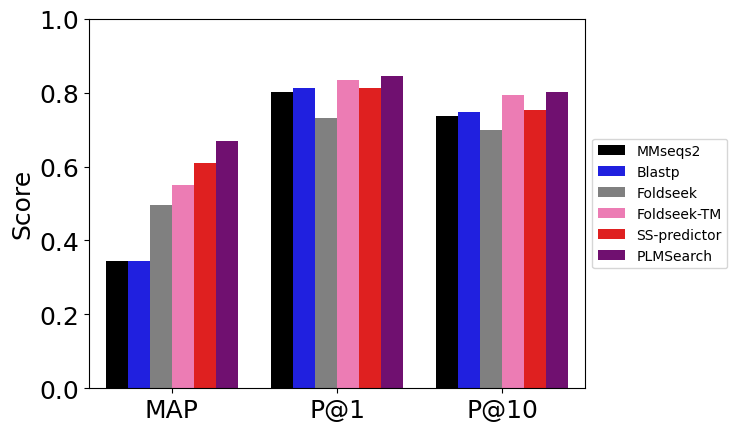

In [5]:
from plmsearch.plmsearch_util.statistics_util import get_input_output, map_pk, map_pk_plot

todo_name_list = [
    "mmseqs2",
    "blastp",
    "foldseek",
    "foldseek_tm",
    "ss_predictor",
    "plmsearch"
]
color_dict = {
    "MMseqs2": "black",
    "Blastp": "blue",
    "Foldseek": "gray",
    "Foldseek-TM": "#FF69B4",
    "SS-predictor": "red",
    "PLMSearch": "purple"
}
method_list = ["MMseqs2", "Blastp", "Foldseek", "Foldseek-TM", "SS-predictor", "PLMSearch"]

# Swiss-Prot to Swiss-Prot
print("Test on Swiss-Prot to Swiss-Prot (50 queries)")
todo_dir_list = ["./plmsearch_data/swissprot_to_swissprot/search_result/"]
ss_mat_path = "./plmsearch_data/swissprot_to_swissprot/ss_mat.npy"
query_protein_fasta_path = "./plmsearch_data/swissprot_to_swissprot/protein.fasta"
target_protein_fasta_path = "./plmsearch_data/swissprot/protein.fasta"
todo_file_list, _ = get_input_output(todo_dir_list, todo_name_list)
k_list = [1,10]
df_dict_1 = map_pk(ss_mat_path, query_protein_fasta_path, target_protein_fasta_path, todo_file_list, method_list, k_list)

# SCOPe40 to Swiss-Prot
print("Test on SCOPe40 to Swiss-Prot (50 queries)")
todo_dir_list = ["./plmsearch_data/scope_to_swissprot/search_result/"]
ss_mat_path = "./plmsearch_data/scope_to_swissprot/ss_mat.npy"
query_protein_fasta_path = "./plmsearch_data/scope_to_swissprot/protein.fasta"
target_protein_fasta_path = "./plmsearch_data/swissprot/protein.fasta"
todo_file_list, _ = get_input_output(todo_dir_list, todo_name_list)
k_list = [1,10]
df_dict_2 = map_pk(ss_mat_path, query_protein_fasta_path, target_protein_fasta_path, todo_file_list, method_list, k_list)

# Summary: Swiss-Prot
print("\nSummary for Swiss-Prot search tests(100 queries in total)")
for i in range(len(df_dict_2['score'])):
    df_dict_2['score'][i] = (df_dict_1['score'][i] + df_dict_2['score'][i])/2
    print(f"{df_dict_2['metric'][i]} of {df_dict_2['method'][i]}:{df_dict_2['score'][i]}")
map_pk_plot(df_dict_2, color_dict, legend=True)

### Ablation experiment

In [6]:
%%bash
cd ./plmsearch_data/scope_test/
# Generate rocx
methods=("euclidean" "cos" "ss_predictor" "plmsearch" "plmalign" "plmalign_ss_predictor" "plmalign_plmsearch")

for method in "${methods[@]}"; do
    ./bench_roc.awk ./scop_lookup.tsv <(cat ./search_result/${method}) > ./rocx/${method}.rocx
    sort -k3,3 -gr ./search_result/${method} > ./prx/sorted_search_result/${method}
    ./bench_pr.awk ./scop_lookup.tsv <(cat ./prx/sorted_search_result/${method}) > ./prx/${method}.prx
done
cd ../..

In [7]:
%%bash
cd ./plmsearch_data/scope_test/
# Generate rocx
methods=("euclidean" "cos" "ss_predictor" "plmsearch" "plmalign" "plmalign_ss_predictor" "plmalign_plmsearch")

for method in "${methods[@]}"; do
    echo "Processing method: $method"
    ### The area under the curve (AUC) of the cumulative ROC curve up to the first FP
    awk '{ famsum+=$3; supfamsum+=$4; foldsum+=$5}END{print famsum/NR,supfamsum/NR,foldsum/NR}' ./rocx/${method}.rocx
    ### The average num of Family TPs, Superfamily TPs, Fold TPs, total TPs up to the first FP
    awk '{ FamTP+=$10; SFamTP+=$11; FoldTP+=$12; TP+=$10; TP+=$11; TP+=$12}END{print FamTP/NR, SFamTP/NR, FoldTP/NR, TP/NR}' ./rocx/${method}.rocx
done
cd ../..

Processing method: euclidean
0.6998 0.309734 0.0393997
6.89048 8.53325 1.70535 17.1291
Processing method: cos
0.705049 0.316141 0.0402877
6.94915 8.79791 1.77836 17.5254
Processing method: ss_predictor
0.869695 0.623761 0.225981
8.78227 34.8892 20.6219 64.2934
Processing method: plmsearch
0.928461 0.826972 0.438417
9.32334 47.4407 48.0156 104.78
Processing method: plmalign


0.946036 0.652936 0.196034
9.04563 32.4003 16.6832 58.1291
Processing method: plmalign_ss_predictor
0.949493 0.665821 0.211643
9.10169 33.605 18.2725 60.9791
Processing method: plmalign_plmsearch
0.933983 0.787343 0.342157
9.11213 41.5098 32.0743 82.6962


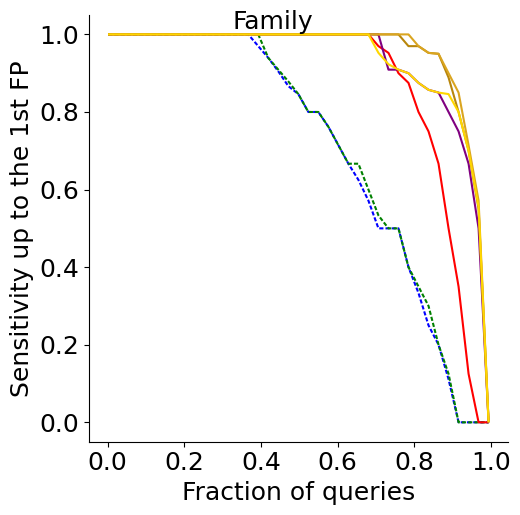

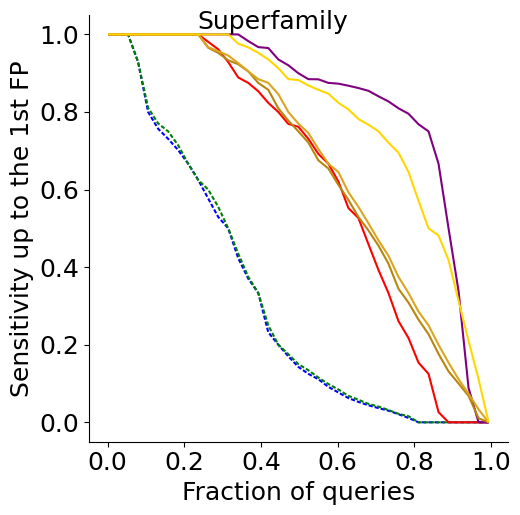

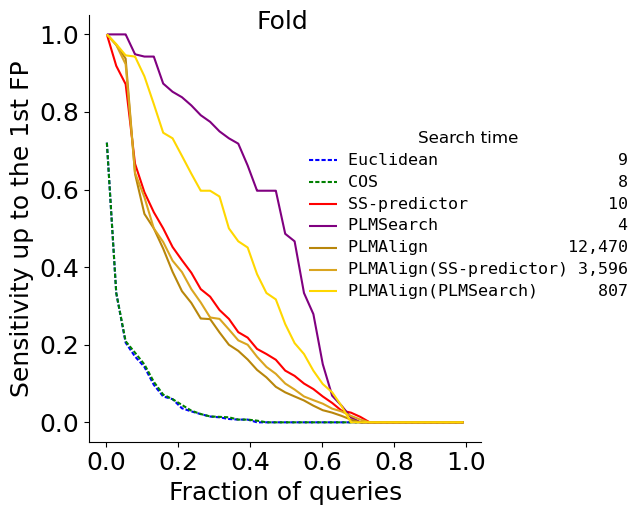

AUPR for Euclidean              (Family): 0.4567820689312
AUPR for COS                    (Family): 0.5143411327384501
AUPR for SS-predictor           (Family): 0.8910530389679001
AUPR for PLMSearch              (Family): 0.9310338048688
AUPR for PLMAlign               (Family): 0.9744809917117998
AUPR for PLMAlign(SS-predictor) (Family): 0.9755803829334501
AUPR for PLMAlign(PLMSearch)    (Family): 0.9568151068159999


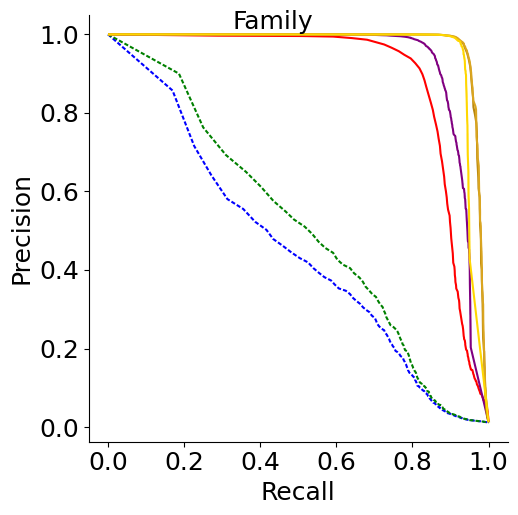

AUPR for Euclidean              (Superfamily): 0.10768427841004999
AUPR for COS                    (Superfamily): 0.13053195018083
AUPR for SS-predictor           (Superfamily): 0.713049393835015
AUPR for PLMSearch              (Superfamily): 0.849445995032355
AUPR for PLMAlign               (Superfamily): 0.8076495610620501
AUPR for PLMAlign(SS-predictor) (Superfamily): 0.8222433250759
AUPR for PLMAlign(PLMSearch)    (Superfamily): 0.88750657271


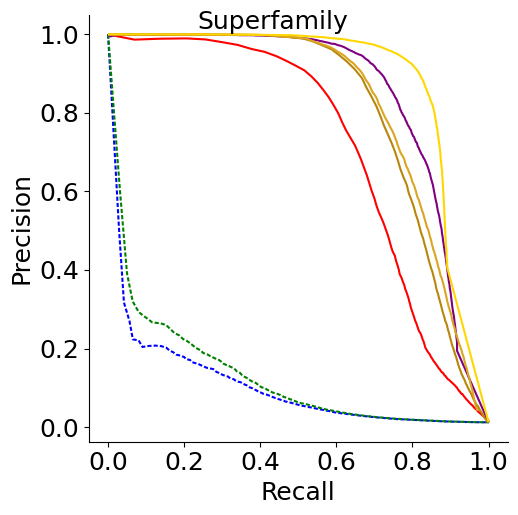

AUPR for Euclidean              (Fold): 0.01684184027118415
AUPR for COS                    (Fold): 0.017752091790424834
AUPR for SS-predictor           (Fold): 0.32446175410940753
AUPR for PLMSearch              (Fold): 0.47340775815267405
AUPR for PLMAlign               (Fold): 0.3540995229999
AUPR for PLMAlign(SS-predictor) (Fold): 0.39195081137830007
AUPR for PLMAlign(PLMSearch)    (Fold): 0.5219468358895


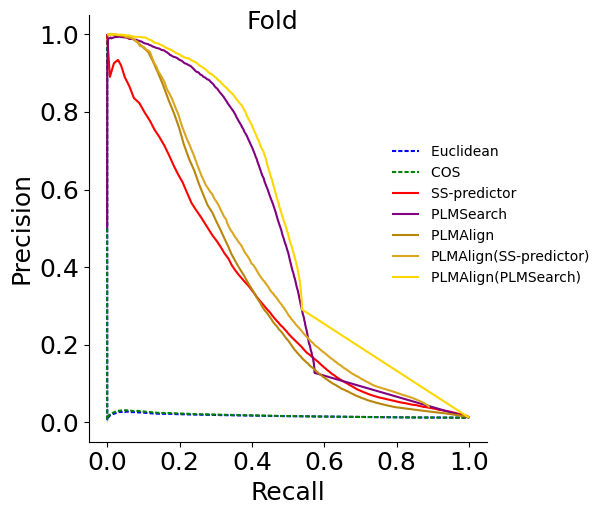

In [9]:
from plmsearch.plmsearch_util.statistics_util import scop_roc, scop_pr

# Ablation1, scope roc
methods_name_list = ["Euclidean", "COS", "SS-predictor", "PLMSearch", "PLMAlign", "PLMAlign(SS-predictor)", "PLMAlign(PLMSearch)"]
line_style = [(2,1), (2,1), (1,0), (1,0), (1,0), (1,0), (1,0)]
color_dict = {
    "Euclidean": "blue",
    "COS": "green",
    "SS-predictor": "red",
    "PLMSearch": "purple",
    "PLMAlign": "darkgoldenrod",
    "PLMAlign(SS-predictor)": "goldenrod",
    "PLMAlign(PLMSearch)": "gold"
}

time_dict = {
    "Euclidean": '9',
    "COS": '8',
    "SS-predictor": '10',
    "PLMSearch": '4',
    "PLMAlign": '12,470',
    "PLMAlign(SS-predictor)": '3,596',
    "PLMAlign(PLMSearch)": '807'
}
# Find the maximum length of method names
max_length = max(len(method) for method in methods_name_list)
# Generate the formatted list
formatted_list = [f"{method.ljust(max_length)}{time_dict[method].rjust(6)}" for method in methods_name_list]
alnresult_dir = "./plmsearch_data/scope_test/rocx/"
methods_filename_list = ["euclidean.rocx", "cos.rocx", "ss_predictor.rocx", "plmsearch.rocx", "plmalign.rocx", "plmalign_ss_predictor.rocx", "plmalign_plmsearch.rocx"]
scop_roc(alnresult_dir, methods_filename_list, formatted_list, line_style, color_dict, time=True)

formatted_list = [f"{method.ljust(max_length)}" for method in methods_name_list]
alnresult_dir = "./plmsearch_data/scope_test/prx/"
methods_filename_list = ["euclidean.prx", "cos.prx", "ss_predictor.prx", "plmsearch.prx", "plmalign.prx", "plmalign_ss_predictor.prx", "plmalign_plmsearch.prx"]
scop_pr(alnresult_dir, methods_filename_list, formatted_list, line_style, color_dict, time=False)

Get search list without self: 4870849it [00:34, 139459.45it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1274240.53it/s]


MAP of Euclidean:0.3649527595075857
P@1 of Euclidean:0.8296329859537834
P@10 of Euclidean:0.6036248300860896


Get search list without self: 4870849it [00:36, 132721.81it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1237443.48it/s]


MAP of COS:0.36768003187296516
P@1 of COS:0.8300860897145447
P@10 of COS:0.6066153149071138


Get search list without self: 4870849it [00:36, 132160.77it/s]
100%|██████████| 4868642/4868642 [00:04<00:00, 1053605.45it/s]


MAP of SS-predictor:0.6014074091216032
P@1 of SS-predictor:0.8219302220208428
P@10 of SS-predictor:0.6869053013140024


Get search list without self: 800221it [00:06, 133264.26it/s]
100%|██████████| 798014/798014 [00:00<00:00, 1245942.84it/s]


MAP of PLMSearch:0.6853687207752468
P@1 of PLMSearch:0.9220661531490711
P@10 of PLMSearch:0.765518803806071


Get search list without self: 4870849it [00:37, 131308.34it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1262901.61it/s]


MAP of PLMAlign:0.6704199260047594
P@1 of PLMAlign:0.9193475305845038
P@10 of PLMAlign:0.7638423198912545


Get search list without self: 1591492it [00:12, 129141.90it/s]
100%|██████████| 1589285/1589285 [00:01<00:00, 1077951.00it/s]


MAP of PLMAlign(SS-predictor):0.6772295774848175
P@1 of PLMAlign(SS-predictor):0.915269596737653
P@10 of PLMAlign(SS-predictor):0.7636157680108744


Get search list without self: 379707it [00:02, 143653.55it/s]
100%|██████████| 377500/377500 [00:00<00:00, 1239024.78it/s]


MAP of PLMAlign(PLMSearch):0.660958402207964
P@1 of PLMAlign(PLMSearch):0.9288627095604893
P@10 of PLMAlign(PLMSearch):0.7634345265065691


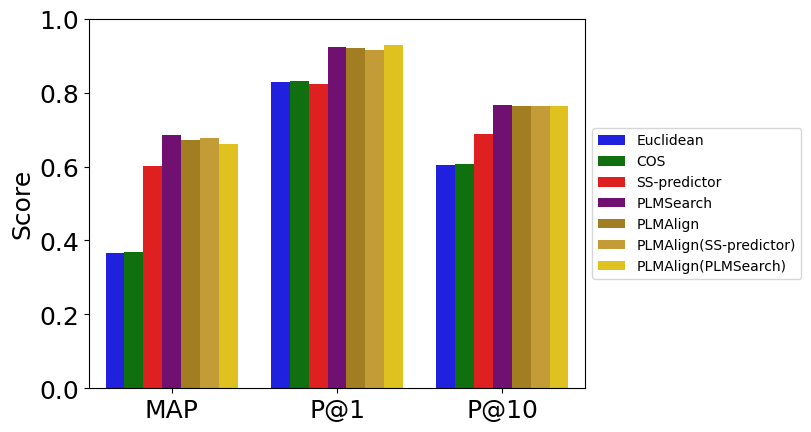

############# Experiment on new proteins #############
Total count of new proteins: 110


Get search list without self: 4870849it [00:37, 129802.12it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1293386.36it/s]


MAP of Euclidean:0.3583666502592451
P@1 of Euclidean:0.7909090909090909
P@10 of Euclidean:0.6218181818181817


Get search list without self: 4870849it [00:46, 105857.50it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1352400.95it/s]


MAP of COS:0.36313303869192853
P@1 of COS:0.7909090909090909
P@10 of COS:0.6281818181818182


Get search list without self: 4870849it [00:37, 128872.68it/s]
100%|██████████| 4868642/4868642 [00:04<00:00, 1155670.29it/s]


MAP of SS-predictor:0.6129093942493895
P@1 of SS-predictor:0.8454545454545455
P@10 of SS-predictor:0.7127272727272728


Get search list without self: 800221it [00:06, 128381.60it/s]
100%|██████████| 798014/798014 [00:00<00:00, 966239.16it/s] 


MAP of PLMSearch:0.6129093942493895
P@1 of PLMSearch:0.8454545454545455
P@10 of PLMSearch:0.7127272727272728


Get search list without self: 4870849it [00:42, 115372.77it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1370209.19it/s]


MAP of PLMAlign:0.6922205342315698
P@1 of PLMAlign:0.9363636363636364
P@10 of PLMAlign:0.8072727272727275


Get search list without self: 1591492it [00:12, 122829.94it/s]
100%|██████████| 1589285/1589285 [00:01<00:00, 1328695.50it/s]


MAP of PLMAlign(SS-predictor):0.6795533437951042
P@1 of PLMAlign(SS-predictor):0.9272727272727272
P@10 of PLMAlign(SS-predictor):0.801818181818182


Get search list without self: 379707it [00:02, 142531.15it/s]
100%|██████████| 377500/377500 [00:00<00:00, 1204876.40it/s]


MAP of PLMAlign(PLMSearch):0.6795533437951042
P@1 of PLMAlign(PLMSearch):0.9272727272727272
P@10 of PLMAlign(PLMSearch):0.801818181818182


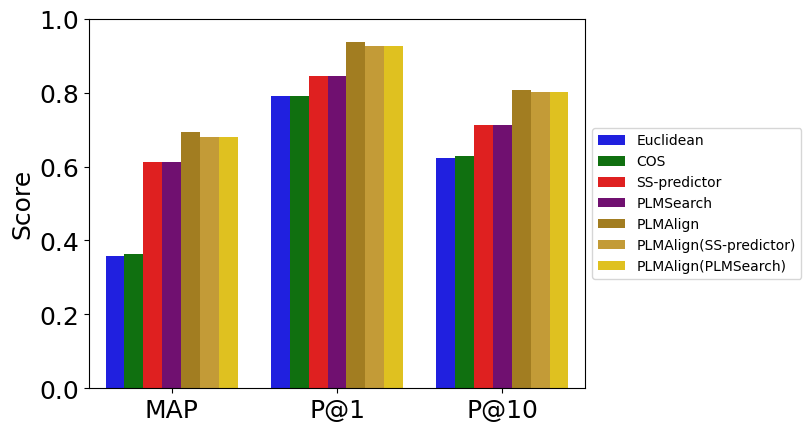

In [9]:
import json
from plmsearch.plmsearch_util.statistics_util import get_input_output, map_pk, map_pk_plot

todo_name_list = [
    "euclidean",
    "cos",
    "ss_predictor",
    "plmsearch",
    "plmalign",
    "plmalign_ss_predictor",
    "plmalign_plmsearch"
]
color_dict = {
    "Euclidean": "blue",
    "COS": "green",
    "SS-predictor": "red",
    "PLMSearch": "purple",
    "PLMAlign": "darkgoldenrod",
    "PLMAlign(SS-predictor)": "goldenrod",
    "PLMAlign(PLMSearch)": "gold"
}

method_list = ["Euclidean", "COS", "SS-predictor", "PLMSearch", "PLMAlign", "PLMAlign(SS-predictor)", "PLMAlign(PLMSearch)"]

todo_dir_list = ["./plmsearch_data/scope_test/search_result/"]
same_fold_mat = "./plmsearch_data/scope_test/same_fold_mat.npy"
query_protein_fasta_path = "./plmsearch_data/scope_test/protein.fasta"
target_protein_fasta_path = "./plmsearch_data/scope_test/protein.fasta"
todo_file_list, _ = get_input_output(todo_dir_list, todo_name_list)
k_list = [1,10]

# All query protein
df_dict_1 = map_pk(same_fold_mat, query_protein_fasta_path, target_protein_fasta_path, todo_file_list, method_list, k_list)
map_pk_plot(df_dict_1, color_dict, legend=True)

# New query protein (without pfam result)
special_protein_list = []
with open("./plmsearch_data/scope_test/pfam_result.json", 'r') as pfam_json_f:
    pfam_result = json.load(pfam_json_f)

for protein_id, pfam_data in pfam_result.items():
    if not pfam_data:
        special_protein_list.append(protein_id)
print(f"############# Experiment on new proteins #############")
print(f"Total count of new proteins: {len(special_protein_list)}")
df_dict_2 = map_pk(same_fold_mat, query_protein_fasta_path, target_protein_fasta_path, todo_file_list, method_list, k_list, special_protein_list=special_protein_list)
map_pk_plot(df_dict_2, color_dict, legend=True)

### Why SS-predictor performs better than Euclidean and COS?

**Notice: If `CPU ONLY`, change the settings as described below**

We have 4 GPUs in total!, we will use as you selected
Spearman correlation coefficient of euclidean = 0.3391155247823299


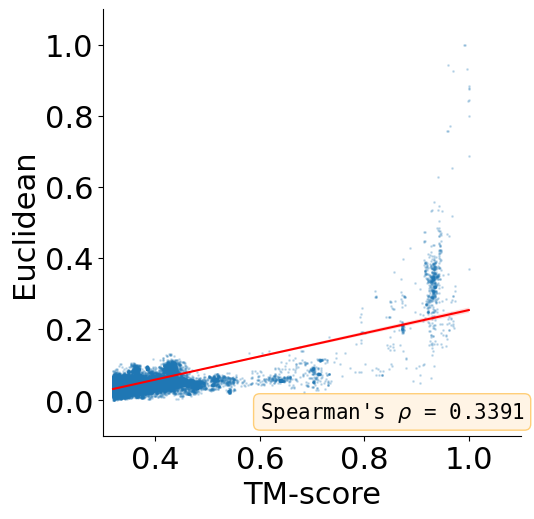

We have 4 GPUs in total!, we will use as you selected
Spearman correlation coefficient of cos = 0.34663561255401576


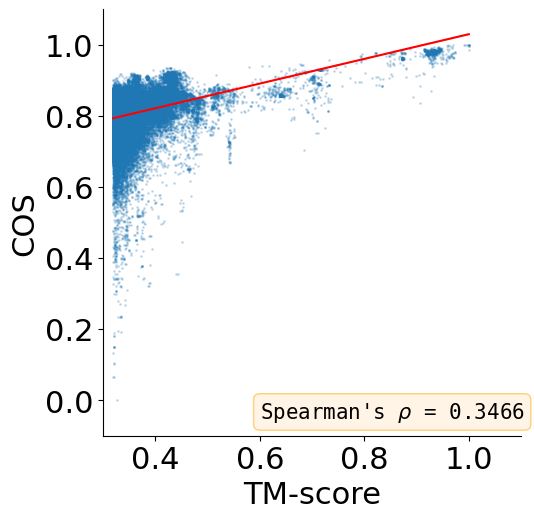

We have 4 GPUs in total!, we will use as you selected
Spearman correlation coefficient of SS-predictor = 0.502437760706421


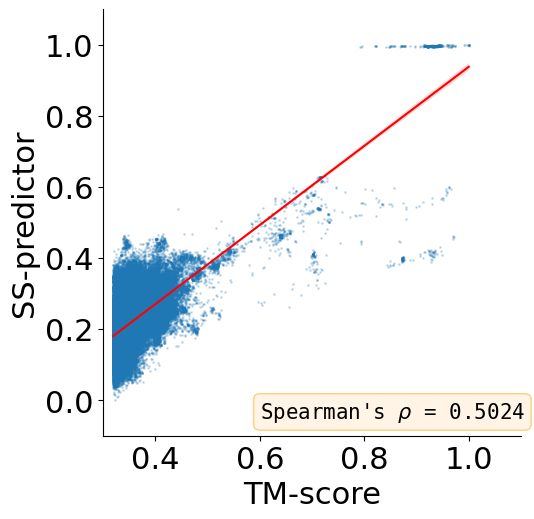

In [10]:
from plmsearch.plmsearch_util.statistics_util import esm_similarity_correlation_statistics, plmsearch_correlation_statistics

# ss_esm_similarity statistics(swissprot_to_swissprot_5)
query_esm_filename = './plmsearch_data/swissprot_to_swissprot_5/embedding.pkl'
target_esm_filename = './plmsearch_data/swissprot/embedding.pkl'
device_id = [0]
# If cpu only
# device_id = [] 

query_protein_fasta_path = "./plmsearch_data/swissprot_to_swissprot_5/protein.fasta"
target_protein_fasta_path = "./plmsearch_data/swissprot/protein.fasta"
ss_mat_path = "./plmsearch_data/swissprot_to_swissprot_5/ss_mat.npy"

esm_similarity_correlation_statistics(query_esm_filename, target_esm_filename, query_protein_fasta_path, target_protein_fasta_path, ss_mat_path, device_id, mode='euclidean')

esm_similarity_correlation_statistics(query_esm_filename, target_esm_filename, query_protein_fasta_path, target_protein_fasta_path, ss_mat_path, device_id, mode='cos')

# ss_predictor_score statistics
save_model_path = './plmsearch_data/model/plmsearch.sav'
plmsearch_correlation_statistics(query_esm_filename, target_esm_filename, query_protein_fasta_path, target_protein_fasta_path, ss_mat_path, save_model_path, device_id)

### Which pair is recalled? Which pair is missed?


Get search list without self: 5681it [00:00, 61226.55it/s]
100%|██████████| 5000/5000 [00:00<00:00, 1129748.42it/s]
Get search list without self: 837it [00:00, 66842.45it/s]
100%|██████████| 832/832 [00:00<00:00, 1136697.37it/s]
Get search list without self: 7488it [00:00, 68930.97it/s]
100%|██████████| 5000/5000 [00:00<00:00, 1156857.90it/s]
Get search list without self: 7488it [00:00, 79792.25it/s]
100%|██████████| 5000/5000 [00:00<00:00, 2278769.97it/s]
Get search list without self: 2150700it [00:21, 101776.20it/s]
100%|██████████| 5000/5000 [00:00<00:00, 2012815.05it/s]
Get search list without self: 17365it [00:00, 102247.10it/s]
100%|██████████| 5000/5000 [00:00<00:00, 2079682.67it/s]


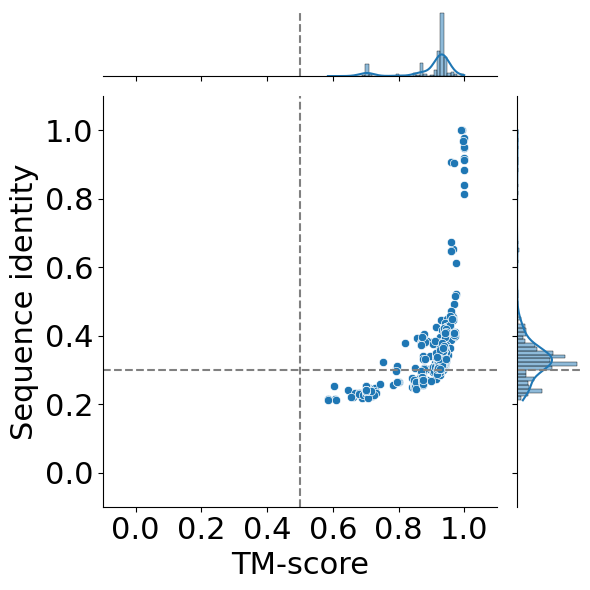

Statistics_result:
st1_se1_num=574/574
st1_se1_rate=1.0
st1_se0_num=183/1105
st1_se0_rate=0.16561085972850678
st1_num=757/1679
st1_rate=0.4508636092912448
---------------------------------------------


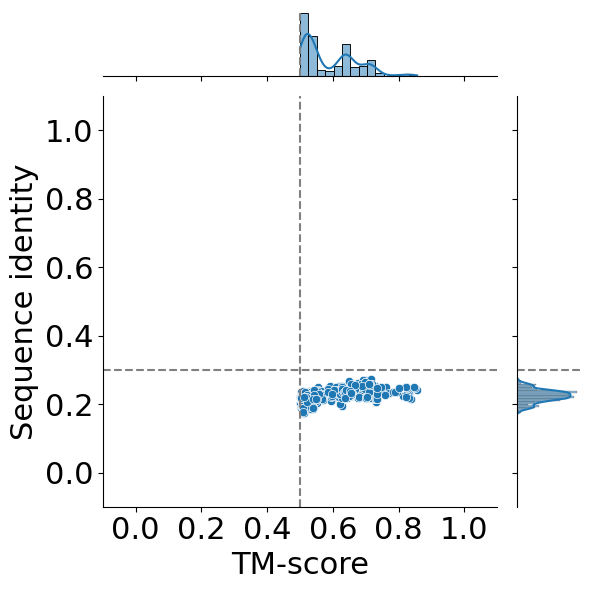

Statistics_result:
st1_se1_num=0/574
st1_se1_rate=0.0
st1_se0_num=922/1105
st1_se0_rate=0.8343891402714932
st1_num=922/1679
st1_rate=0.5491363907087552
---------------------------------------------


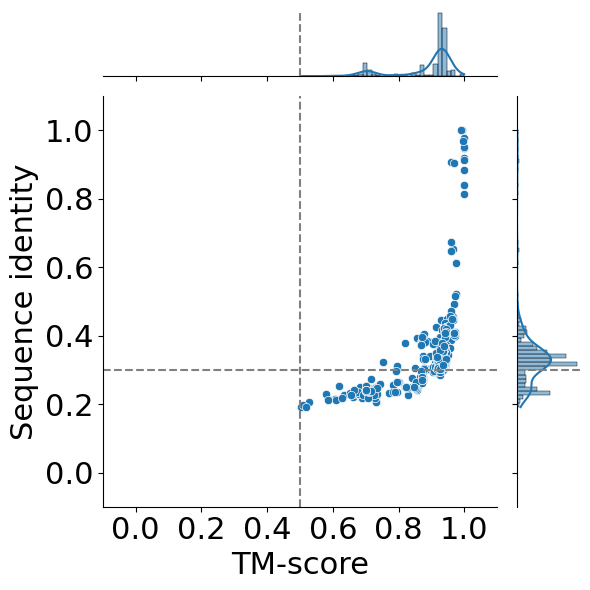

Statistics_result:
st1_se1_num=574/574
st1_se1_rate=1.0
st1_se0_num=203/1105
st1_se0_rate=0.18371040723981902
st1_num=777/1679
st1_rate=0.46277546158427635
---------------------------------------------


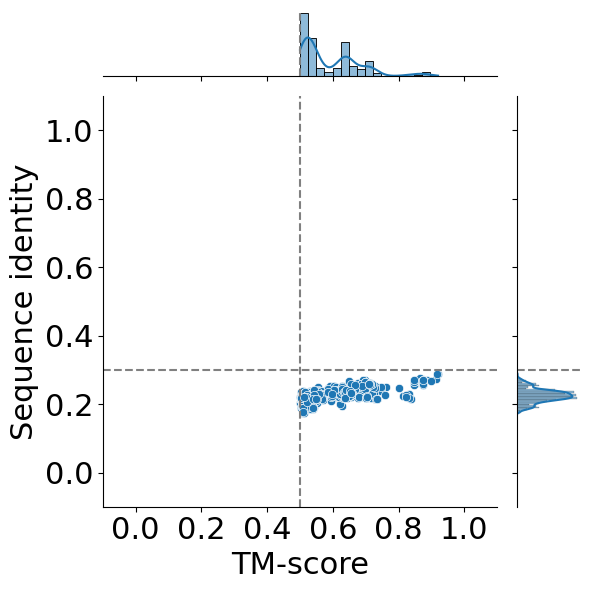

Statistics_result:
st1_se1_num=0/574
st1_se1_rate=0.0
st1_se0_num=902/1105
st1_se0_rate=0.816289592760181
st1_num=902/1679
st1_rate=0.5372245384157236
---------------------------------------------


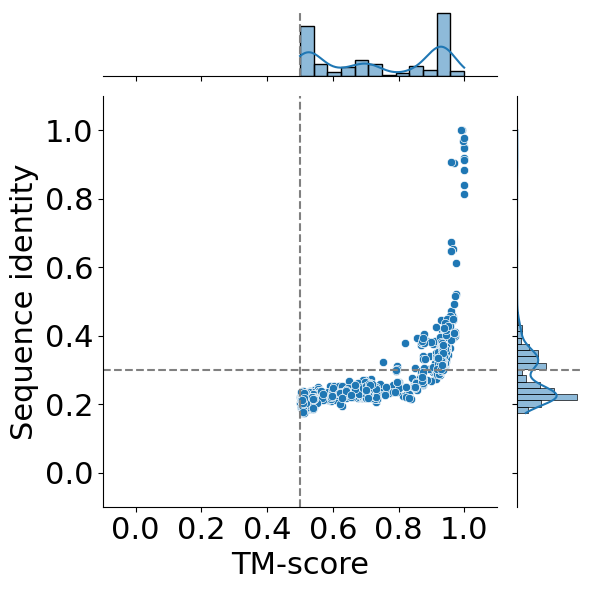

Statistics_result:
st1_se1_num=574/574
st1_se1_rate=1.0
st1_se0_num=934/1105
st1_se0_rate=0.8452488687782805
st1_num=1508/1679
st1_rate=0.8981536628945801
---------------------------------------------


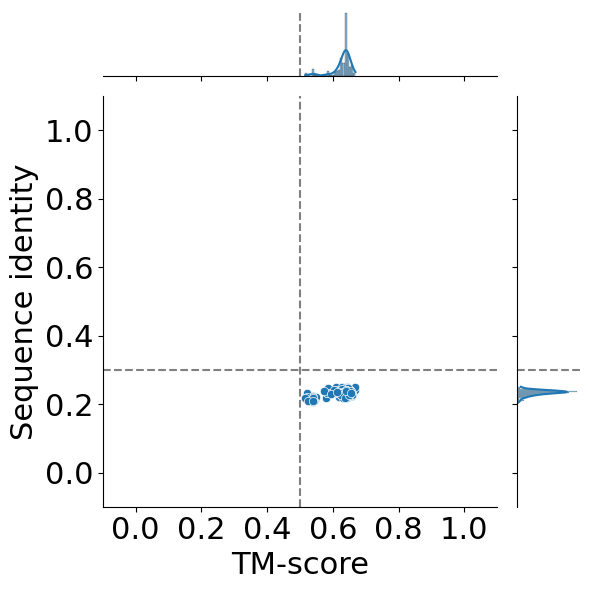

Statistics_result:
st1_se1_num=0/574
st1_se1_rate=0.0
st1_se0_num=171/1105
st1_se0_rate=0.15475113122171946
st1_num=171/1679
st1_rate=0.10184633710541989
---------------------------------------------


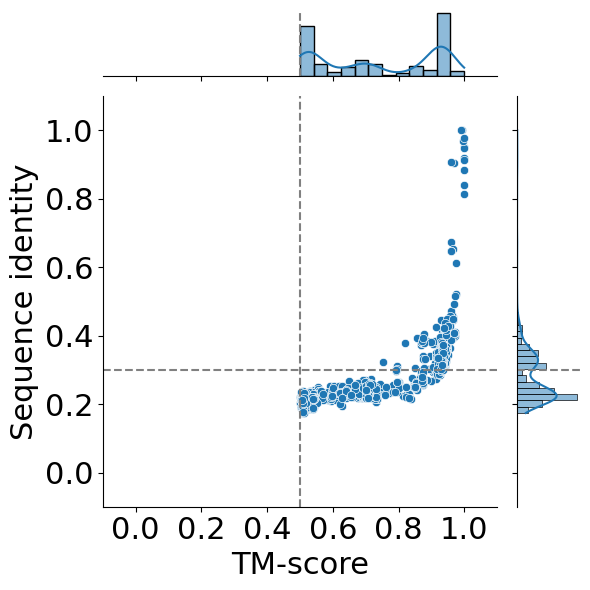

Statistics_result:
st1_se1_num=574/574
st1_se1_rate=1.0
st1_se0_num=940/1105
st1_se0_rate=0.8506787330316742
st1_num=1514/1679
st1_rate=0.9017272185824896
---------------------------------------------


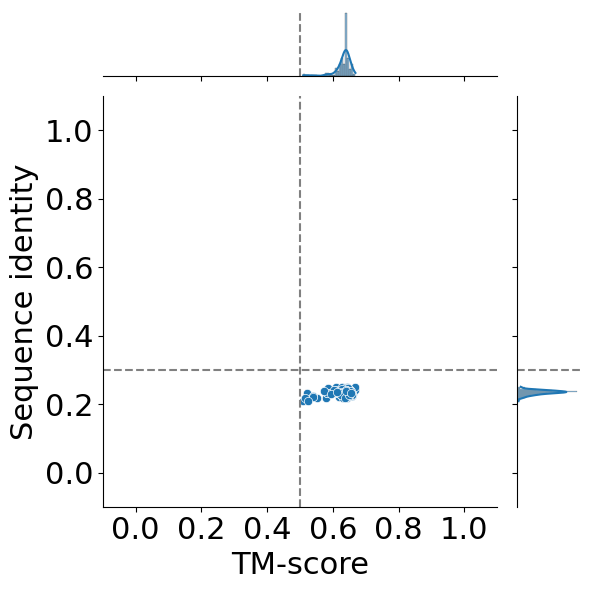

Statistics_result:
st1_se1_num=0/574
st1_se1_rate=0.0
st1_se0_num=165/1105
st1_se0_rate=0.1493212669683258
st1_num=165/1679
st1_rate=0.09827278141751042
---------------------------------------------


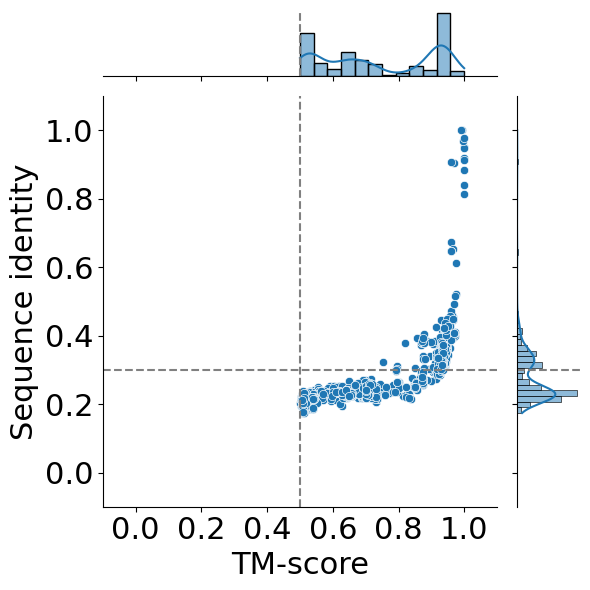

Statistics_result:
st1_se1_num=574/574
st1_se1_rate=1.0
st1_se0_num=1022/1105
st1_se0_rate=0.9248868778280543
st1_num=1596/1679
st1_rate=0.950565812983919
---------------------------------------------


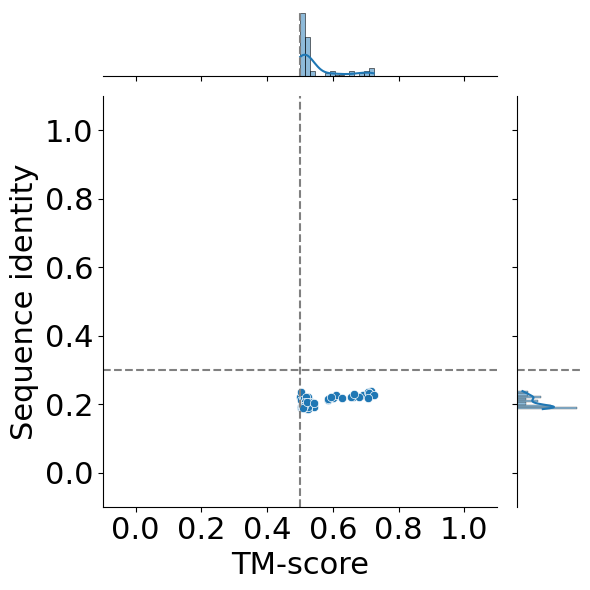

Statistics_result:
st1_se1_num=0/574
st1_se1_rate=0.0
st1_se0_num=83/1105
st1_se0_rate=0.0751131221719457
st1_num=83/1679
st1_rate=0.049434187016081
---------------------------------------------


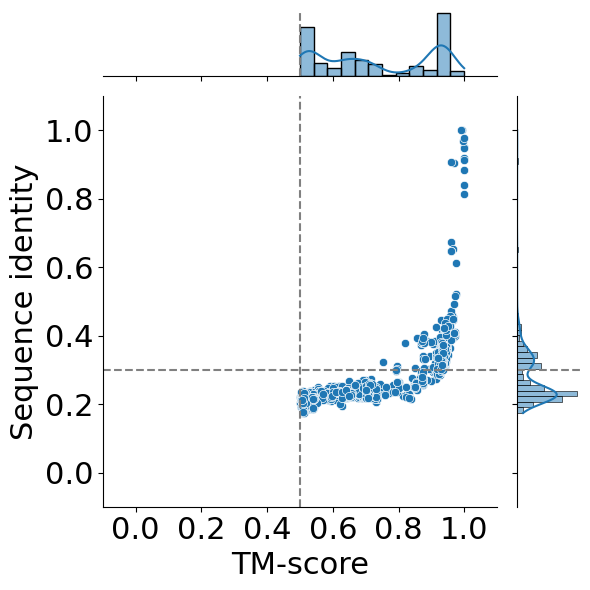

Statistics_result:
st1_se1_num=574/574
st1_se1_rate=1.0
st1_se0_num=1087/1105
st1_se0_rate=0.983710407239819
st1_num=1661/1679
st1_rate=0.9892793329362716
---------------------------------------------


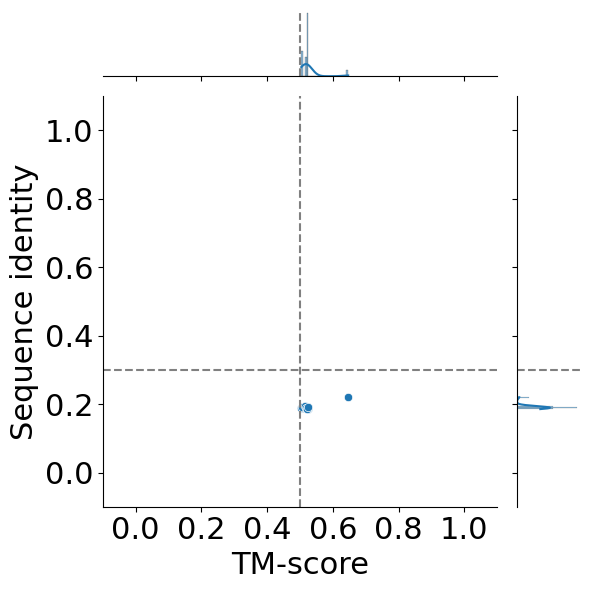

Statistics_result:
st1_se1_num=0/574
st1_se1_rate=0.0
st1_se0_num=18/1105
st1_se0_rate=0.016289592760180997
st1_num=18/1679
st1_rate=0.01072066706372841
---------------------------------------------


In [11]:
from plmsearch.plmsearch_util.statistics_util import get_input_output, get_miss_wrong_statistics, sequence_structure_statistics, pair_list_statistics

# Miss fault statistics(swissprot_to_swissprot, get & miss)
todo_dir_list = ["./plmsearch_data/swissprot_to_swissprot_5/search_result/"]
ss_mat_path = "./plmsearch_data/swissprot_to_swissprot_5/ss_mat.npy"
query_protein_fasta_path = "./plmsearch_data/swissprot_to_swissprot_5/protein.fasta"
target_protein_fasta_path = "./plmsearch_data/swissprot/protein.fasta"
result_path = './scientist_figures/swissprot_to_swissprot_5/get_miss/'
todo_name_list = [
    'mmseqs2',
    'blastp',
    'foldseek',
    'foldseek_tm',
    'ss_predictor',
    'plmsearch'
]
todo_file_list, todo_fig_list = get_input_output(todo_dir_list, todo_name_list)
top_list = [5000, 5000, 5000, 5000, 5000, 5000]
get_miss_wrong_statistics(ss_mat_path, query_protein_fasta_path, target_protein_fasta_path, todo_file_list, top_list, result_path)

# Pair list statistics
pair_list_filename_list = []
pair_list_filename_list.append("./scientist_figures/swissprot_to_swissprot_5/get_miss/get_mmseqs2.txt")
pair_list_filename_list.append("./scientist_figures/swissprot_to_swissprot_5/get_miss/miss_mmseqs2.txt")
pair_list_filename_list.append("./scientist_figures/swissprot_to_swissprot_5/get_miss/get_blastp.txt")
pair_list_filename_list.append("./scientist_figures/swissprot_to_swissprot_5/get_miss/miss_blastp.txt")
pair_list_filename_list.append("./scientist_figures/swissprot_to_swissprot_5/get_miss/get_foldseek.txt")
pair_list_filename_list.append("./scientist_figures/swissprot_to_swissprot_5/get_miss/miss_foldseek.txt")
pair_list_filename_list.append("./scientist_figures/swissprot_to_swissprot_5/get_miss/get_foldseek_tm.txt")
pair_list_filename_list.append("./scientist_figures/swissprot_to_swissprot_5/get_miss/miss_foldseek_tm.txt")
pair_list_filename_list.append("./scientist_figures/swissprot_to_swissprot_5/get_miss/get_ss_predictor.txt")
pair_list_filename_list.append("./scientist_figures/swissprot_to_swissprot_5/get_miss/miss_ss_predictor.txt")
pair_list_filename_list.append("./scientist_figures/swissprot_to_swissprot_5/get_miss/get_plmsearch.txt")
pair_list_filename_list.append("./scientist_figures/swissprot_to_swissprot_5/get_miss/miss_plmsearch.txt")

query_protein_fasta_path = "./plmsearch_data/swissprot_to_swissprot_5/protein.fasta"
target_protein_fasta_path = "./plmsearch_data/swissprot/protein.fasta"
ss_mat_path = "./plmsearch_data/swissprot_to_swissprot_5/ss_mat.npy"
st1_se1_sum, st1_se0_sum, st1_sum = sequence_structure_statistics(query_protein_fasta_path, target_protein_fasta_path, ss_mat_path)

for pair_list_filename in pair_list_filename_list:
    pair_list_statistics(pair_list_filename, query_protein_fasta_path, target_protein_fasta_path, ss_mat_path, st1_se1_sum, st1_se0_sum, st1_sum)

### (Supplement) Pfam Comparison between PfamFamily & PfamClan

Get search list without self: 12869it [00:00, 221922.76it/s]


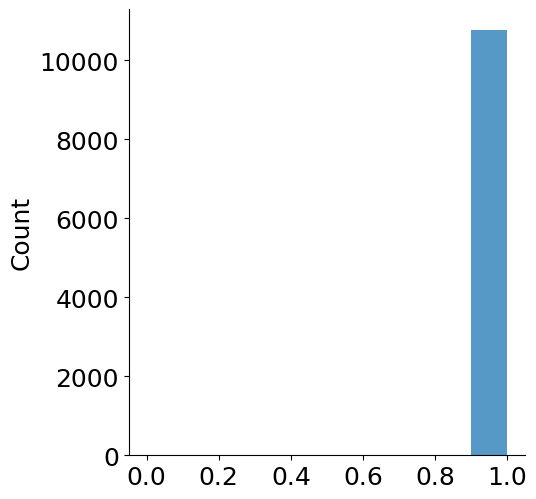

-------------- Output for ./scientist_figures/scope_test/pfamfamily.txt --------------

rec_rate:0.05644886289116806
rec:10760/190615

pre_rate:0.9988860007426662
pre:10760/10772



Get search list without self: 151547it [00:00, 189767.38it/s]


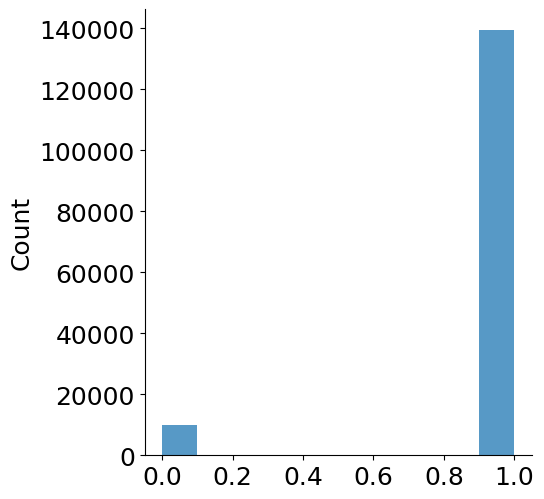

-------------- Output for ./scientist_figures/scope_test/pfamclan.txt --------------

rec_rate:0.731254098575663
rec:139388/190615

pre_rate:0.9326731348277015
pre:139388/149450



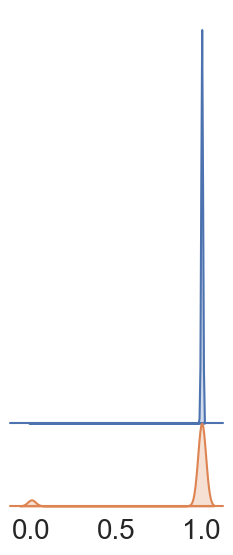

Get search list without self: 28941it [00:00, 192904.00it/s]


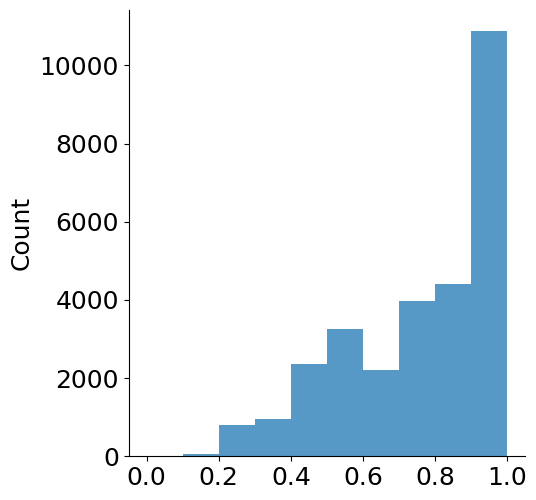

-------------- Output for ./scientist_figures/swissprot_to_swissprot/pfamfamily.txt --------------

rec_rate:0.30956497769758934
rec:24707/79812

pre_rate:0.8551798137828389
pre:24707/28891



Get search list without self: 571354it [00:03, 184227.23it/s]


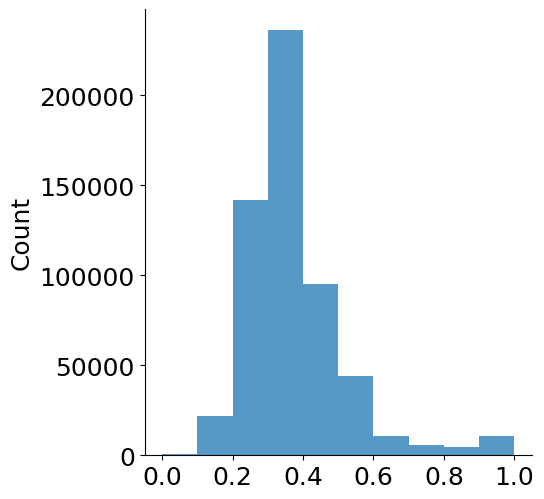

-------------- Output for ./scientist_figures/swissprot_to_swissprot/pfamclan.txt --------------

rec_rate:0.9495313987871498
rec:75784/79812

pre_rate:0.13265091790010222
pre:75784/571304



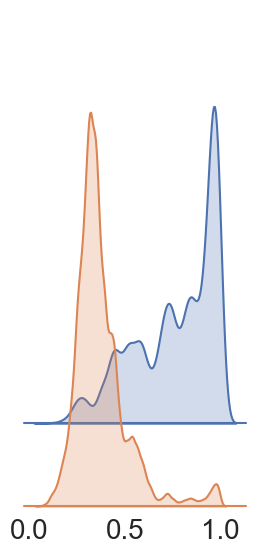

Get search list without self: 15744it [00:00, 187848.46it/s]


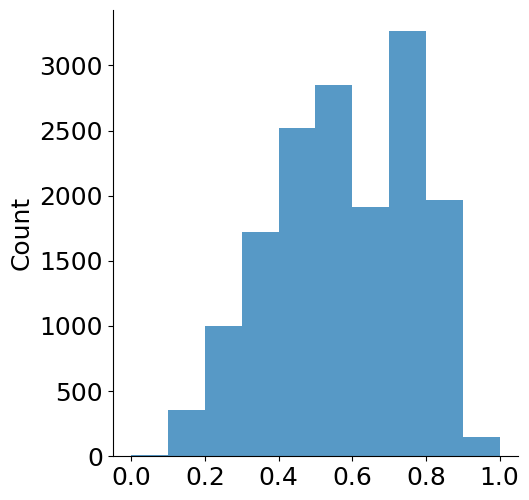

-------------- Output for ./scientist_figures/scope_to_swissprot/pfamfamily.txt --------------

rec_rate:0.34709244617859464
rec:10141/29217

pre_rate:0.6441183943089431
pre:10141/15744



Get search list without self: 249062it [00:01, 163073.18it/s]


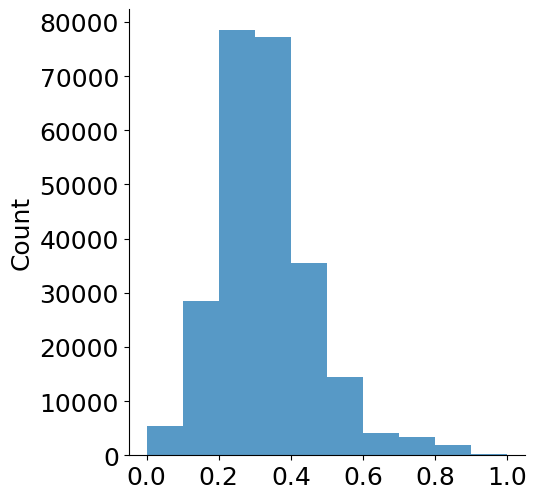

-------------- Output for ./scientist_figures/scope_to_swissprot/pfamclan.txt --------------

rec_rate:0.8263682102885307
rec:24144/29217

pre_rate:0.09693971782126538
pre:24144/249062



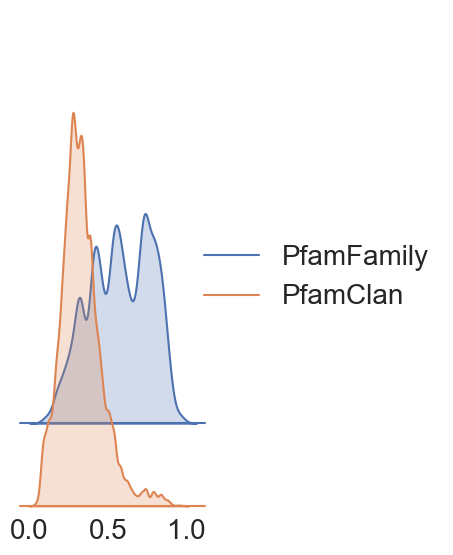

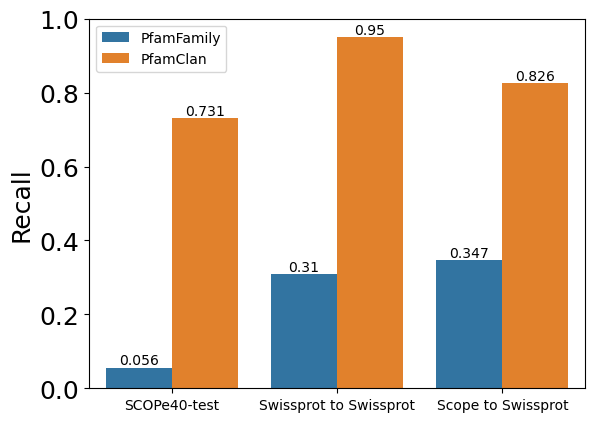

In [11]:
from plmsearch.plmsearch_util.statistics_util import get_input_output, precision_recall_statistics, precision_recall_plot

df_dict = {}
df_dict['dataset'] = []
df_dict['recall'] = []
df_dict['method'] = []


# Pfam Compare(scope)
todo_dir_list = ["./plmsearch_data/scope_test/search_result/"]
ss_mat_path = "./plmsearch_data/scope_test/same_fold_mat.npy"
query_protein_fasta_path = "./plmsearch_data/scope_test/protein.fasta"
target_protein_fasta_path = "./plmsearch_data/scope_test/protein.fasta"
todo_name_list = [
    'pfamfamily',
    'pfamclan'
    ]
todo_file_list, todo_fig_list = get_input_output(todo_dir_list, todo_name_list)
method_list = ['PfamFamily', 'PfamClan']
top_list = ['all', 'all']
recall_dict = precision_recall_statistics(ss_mat_path, query_protein_fasta_path, target_protein_fasta_path, todo_file_list, todo_fig_list, method_list, top_list, legend=False)
for method in method_list:
    df_dict['dataset'].append('SCOPe40-test')
    df_dict['recall'].append(eval(f"{recall_dict[method]:.3f}"))
    df_dict['method'].append(method)

# Pfam Compare(swissprot_to_swissprot)
todo_dir_list = ["./plmsearch_data/swissprot_to_swissprot/search_result/"]
ss_mat_path = "./plmsearch_data/swissprot_to_swissprot/ss_mat.npy"
query_protein_fasta_path = "./plmsearch_data/swissprot_to_swissprot/protein.fasta"
target_protein_fasta_path = "./plmsearch_data/swissprot/protein.fasta"
todo_name_list = [
    'pfamfamily',
    'pfamclan'
    ]
todo_file_list, todo_fig_list = get_input_output(todo_dir_list, todo_name_list)
method_list = ['PfamFamily', 'PfamClan']
top_list = ['all', 'all']
recall_dict = precision_recall_statistics(ss_mat_path, query_protein_fasta_path, target_protein_fasta_path, todo_file_list, todo_fig_list, method_list, top_list, legend=False)
for method in method_list:
    df_dict['dataset'].append('Swissprot to Swissprot')
    df_dict['recall'].append(eval(f"{recall_dict[method]:.3f}"))
    df_dict['method'].append(method)

# Pfam Compare(scope_to_swissprot)
todo_dir_list = ["./plmsearch_data/scope_to_swissprot/search_result/"]
ss_mat_path = "./plmsearch_data/scope_to_swissprot/ss_mat.npy"
query_protein_fasta_path = "./plmsearch_data/scope_to_swissprot/protein.fasta"
target_protein_fasta_path = "./plmsearch_data/swissprot/protein.fasta"
todo_name_list = [
    'pfamfamily',
    'pfamclan'
    ]
todo_file_list, todo_fig_list = get_input_output(todo_dir_list, todo_name_list)
method_list = ['PfamFamily', 'PfamClan']
top_list = ['all', 'all']
recall_dict = precision_recall_statistics(ss_mat_path, query_protein_fasta_path, target_protein_fasta_path, todo_file_list, todo_fig_list, method_list, top_list, legend=True)
for method in method_list:
    df_dict['dataset'].append('Scope to Swissprot')
    df_dict['recall'].append(eval(f"{recall_dict[method]:.3f}"))
    df_dict['method'].append(method)

precision_recall_plot(df_dict)


### Statistics of the number of proteins in protein families on SCOPe40-test, Swiss-Prot

2207it [00:00, 159989.44it/s]
430140it [00:02, 183642.22it/s]


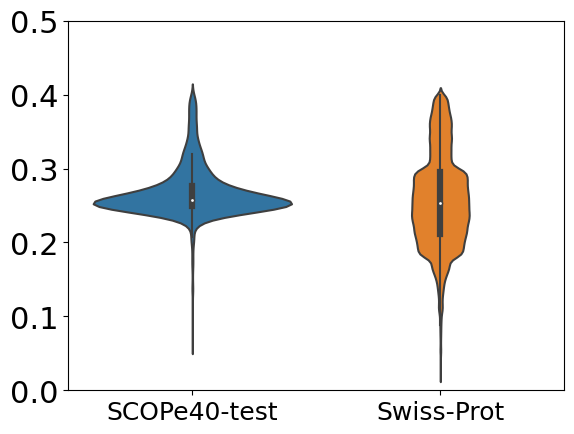

/mnt/data/lw/plmsearch_new/plmsearch/plmsearch_util/statistics_util.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(label)) for label in ax.get_xticks()])


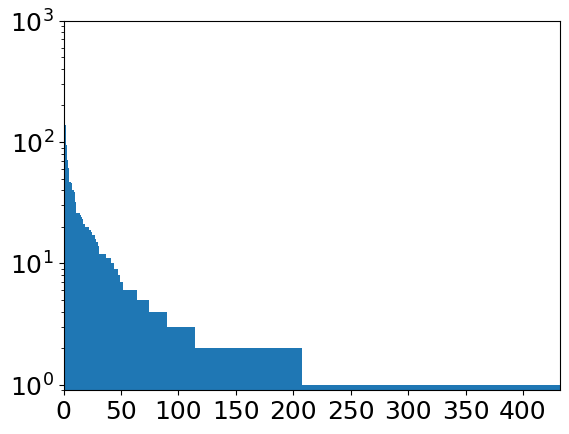

/mnt/data/lw/plmsearch_new/plmsearch/plmsearch_util/statistics_util.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(label)) for label in ax.get_xticks()])


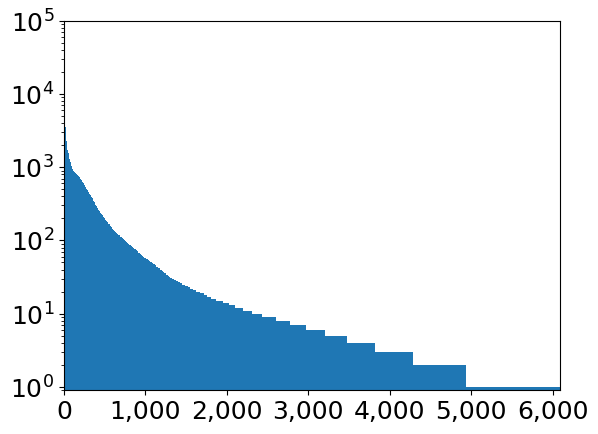

In [2]:
from plmsearch.plmsearch_util.statistics_util import cluster_statistics, max_sequence_identity_statistics

max_sequence_identity_list = ["./plmsearch_data/scope_test/max_sequence_identity", "./plmsearch_data/swissprot/max_sequence_identity"]
dataset_list = ["SCOPe40-test", "Swiss-Prot"]
max_sequence_identity_statistics(max_sequence_identity_list, dataset_list)

# Cluster statistics(scope test)
pfam_result = "./plmsearch_data/scope_test/pfam_result.json"
clan_file = './plmsearch_data/Pfam_db/Pfam-A.clans.tsv'
result_path = './scientist_figures/scope_test/'
cluster_statistics(pfam_result, clan_file, result_path)

# Cluster statistics(swissprot)
pfam_result = "./plmsearch_data/swissprot/pfam_result.json"
clan_file = './plmsearch_data/Pfam_db/Pfam-A.clans.tsv'
result_path = './scientist_figures/swissprot/'
cluster_statistics(pfam_result, clan_file, result_path)


### Reference similarity statistics

0it [00:00, ?it/s]

1790600it [00:13, 136172.55it/s]


Same fold pairs = 18743
Different fold pairs = 1771857
P(Same fold) = 0.010467441081201831
P(Different fold) = 0.9895325589187982
Similarity = 0.1, Same Fold Posterior Probability = 0.0
Similarity = 0.1, Different Fold Posterior Probability = 1.0
Similarity = 0.3, Same Fold Posterior Probability = 0.003773584905660376
Similarity = 0.3, Different Fold Posterior Probability = 0.9962264150943396
Similarity = 0.5, Same Fold Posterior Probability = 0.45652173913043476
Similarity = 0.5, Different Fold Posterior Probability = 0.5434782608695653
Similarity = 0.7, Same Fold Posterior Probability = 1.0
Similarity = 0.7, Different Fold Posterior Probability = 0.0
Similarity = 0.9, Same Fold Posterior Probability = 1.0
Similarity = 0.9, Different Fold Posterior Probability = 0.0


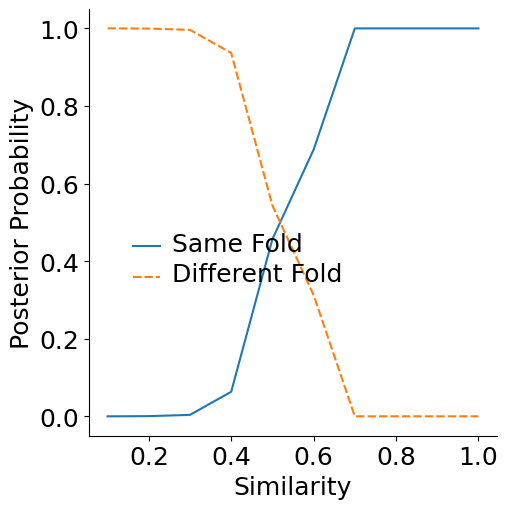

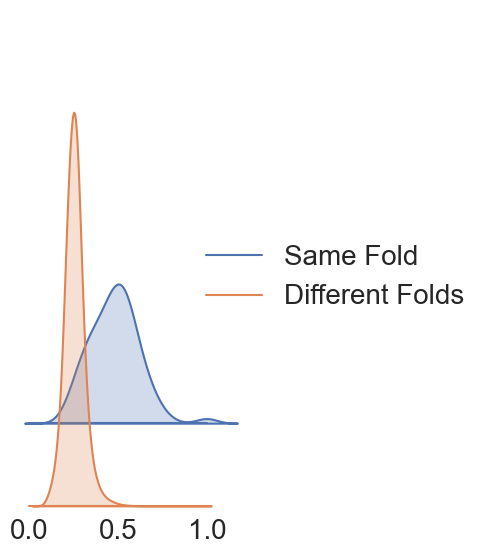

1790600it [00:12, 137761.43it/s]


Same fold pairs = 18743
Different fold pairs = 1771857
P(Same fold) = 0.010467441081201831
P(Different fold) = 0.9895325589187982
Similarity = 0.991, Same Fold Posterior Probability = 0.3274647887323944
Similarity = 0.991, Different Fold Posterior Probability = 0.6725352112676056
Similarity = 0.993, Same Fold Posterior Probability = 0.4444444444444444
Similarity = 0.993, Different Fold Posterior Probability = 0.5555555555555556
Similarity = 0.995, Same Fold Posterior Probability = 0.717948717948718
Similarity = 0.995, Different Fold Posterior Probability = 0.28205128205128205
Similarity = 0.997, Same Fold Posterior Probability = 1.0
Similarity = 0.997, Different Fold Posterior Probability = 0.0
Similarity = 0.999, Same Fold Posterior Probability = 1.0
Similarity = 0.999, Different Fold Posterior Probability = 0.0


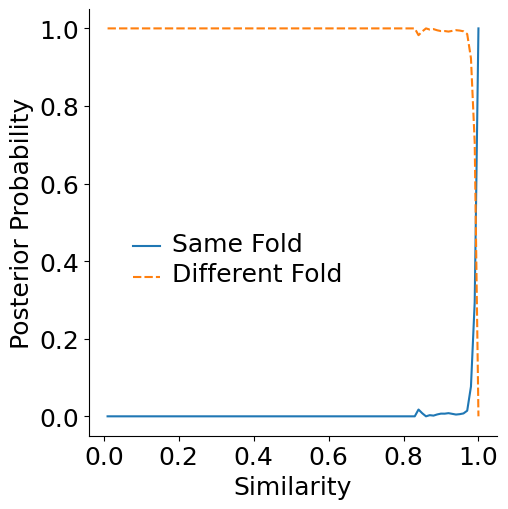

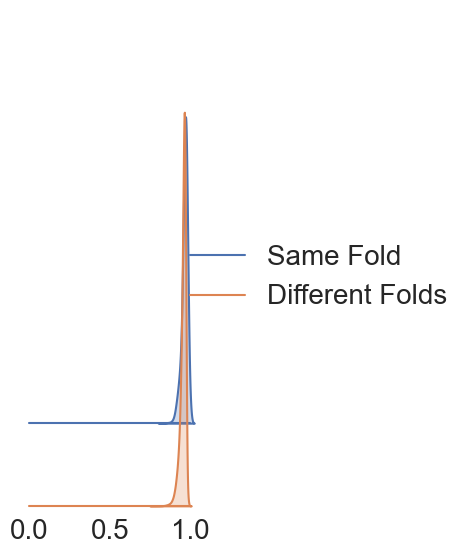

1790600it [00:14, 122736.42it/s]


Same fold pairs = 18743
Different fold pairs = 1771857
P(Same fold) = 0.010467441081201831
P(Different fold) = 0.9895325589187982
Similarity = 3.0, Same Fold Posterior Probability = 0.0014492753623188404
Similarity = 3.0, Different Fold Posterior Probability = 0.9985507246376811
Similarity = 5.0, Same Fold Posterior Probability = 0.02036199095022624
Similarity = 5.0, Different Fold Posterior Probability = 0.9796380090497737
Similarity = 7.0, Same Fold Posterior Probability = 0.2857142857142857
Similarity = 7.0, Different Fold Posterior Probability = 0.7142857142857143
Similarity = 9.0, Same Fold Posterior Probability = 0.5454545454545454
Similarity = 9.0, Different Fold Posterior Probability = 0.45454545454545453
Similarity = 9.5, Same Fold Posterior Probability = 0.7499999999999999
Similarity = 9.5, Different Fold Posterior Probability = 0.25000000000000006


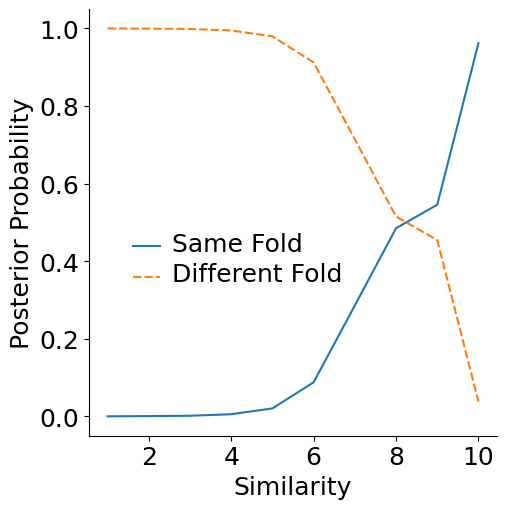

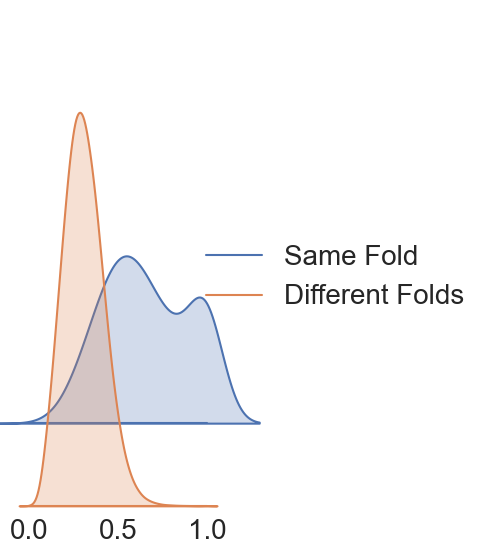

In [3]:
from plmsearch.plmsearch_util.statistics_util import scope_similarity_statistics

# SS-predictor
similarity_file = "./plmsearch_data/train/scope40_train/reference_similarity/search_result/ss_predictor"
fold_file = "./plmsearch_data/train/scope40_train/reference_similarity/scop_lookup.tsv"
check_set = set((0.1, 0.3, 0.5, 0.7, 0.9))
scope_similarity_statistics(similarity_file, fold_file, check_set, x_gap = 100)

# COS
similarity_file = "./plmsearch_data/train/scope40_train/reference_similarity/search_result/cos"
fold_file = "./plmsearch_data/train/scope40_train/reference_similarity/scop_lookup.tsv"
check_set = set((0.991, 0.993, 0.995, 0.997, 0.999))
scope_similarity_statistics(similarity_file, fold_file, check_set, x_gap = 10)

# PLMAlign
similarity_file = "./plmsearch_data/train/scope40_train/reference_similarity/search_result/plmalign"
fold_file = "./plmsearch_data/train/scope40_train/reference_similarity/scop_lookup.tsv"
check_set = set((3, 5, 7, 9, 9.5))
scope_similarity_statistics(similarity_file, fold_file, check_set, x_gap = 100, is_dot_similarity=True)

## Other baselines

In [4]:
%%bash
cd ./plmsearch_data/scope_test/
# Generate rocx
methods=("3dblastsw" "clesw" "cealn" "dalialn")

for method in "${methods[@]}"; do
    echo "Processing method: $method"
    ### The area under the curve (AUC) of the cumulative ROC curve up to the first FP
    awk '{ famsum+=$3; supfamsum+=$4; foldsum+=$5}END{print famsum/NR,supfamsum/NR,foldsum/NR}' ./rocx/${method}.rocx
    ### The average num of Family TPs, Superfamily TPs, Fold TPs, total TPs up to the first FP
    awk '{ FamTP+=$10; SFamTP+=$11; FoldTP+=$12; TP+=$10; TP+=$11; TP+=$12}END{print FamTP/NR, SFamTP/NR, FoldTP/NR, TP/NR}' ./rocx/${method}.rocx
done
cd ../..

Processing method: 3dblastsw
0.653066 0.255024 0.0453962
6.95567 8.92568 1.44459 17.3259
Processing method: clesw
0.672991 0.265721 0.033716


6.97784 9.65971 1.10691 17.7445
Processing method: cealn
0.847345 0.527171 0.148135
8.70274 23.8292 8.7249 41.2568
Processing method: dalialn
0.923185 0.702481 0.28161
9.23338 33.6232 16.7445 59.601


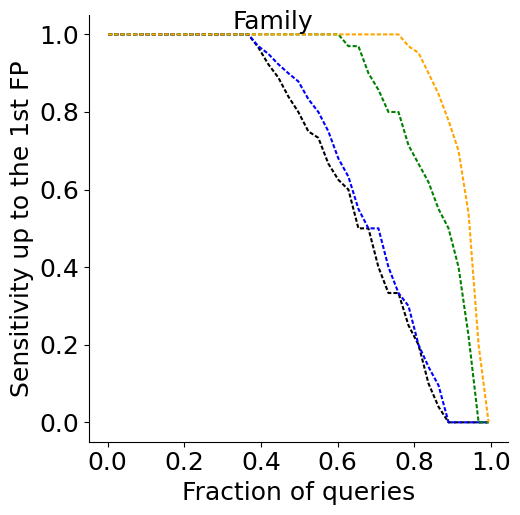

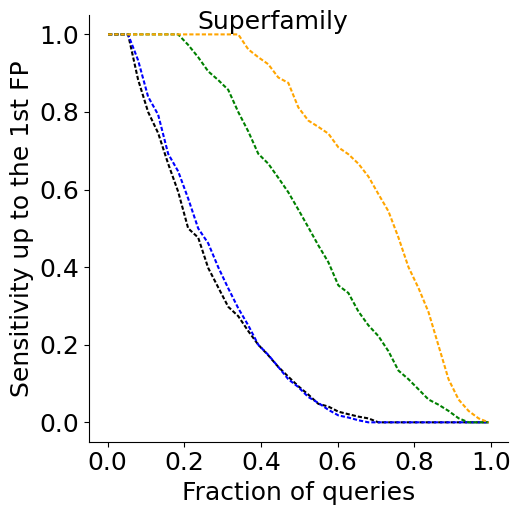

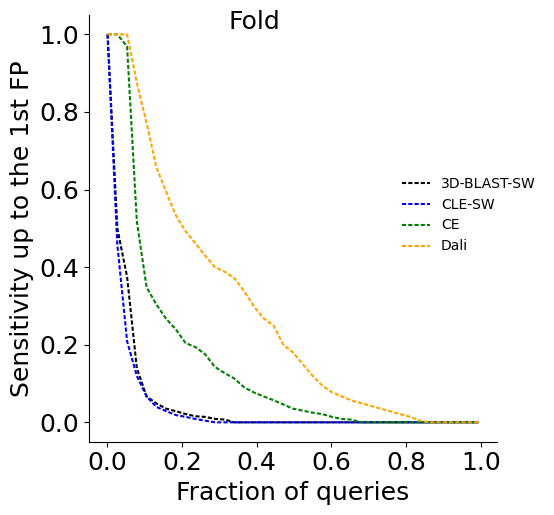

AUPR for 3D-BLAST-SW (Family): 0.62128353284495
AUPR for CLE-SW (Family): 0.43268550590105
AUPR for CE (Family): 0.8820657008359999
AUPR for Dali (Family): 0.9485319491895


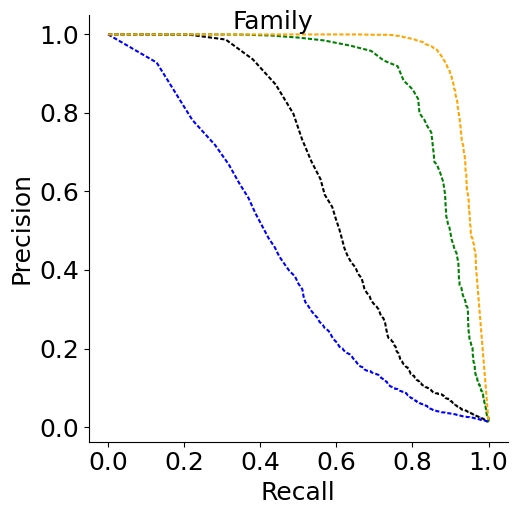

AUPR for 3D-BLAST-SW (Superfamily): 0.26488004733065
AUPR for CLE-SW (Superfamily): 0.17163849933534994
AUPR for CE (Superfamily): 0.6276118624165999
AUPR for Dali (Superfamily): 0.8149325952725001


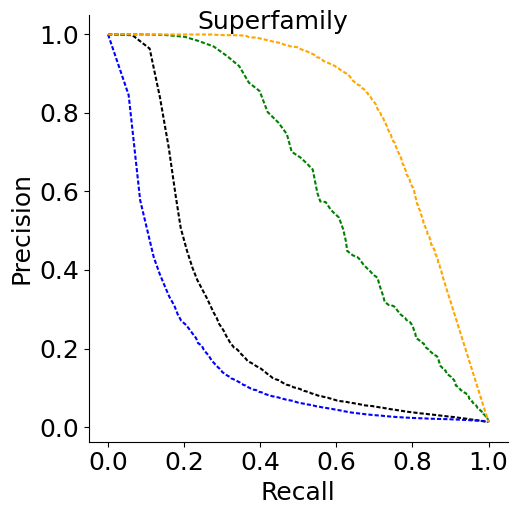

AUPR for 3D-BLAST-SW (Fold): 0.047029300495728
AUPR for CLE-SW (Fold): 0.035361556232895
AUPR for CE (Fold): 0.24513631142033
AUPR for Dali (Fold): 0.4545783160487


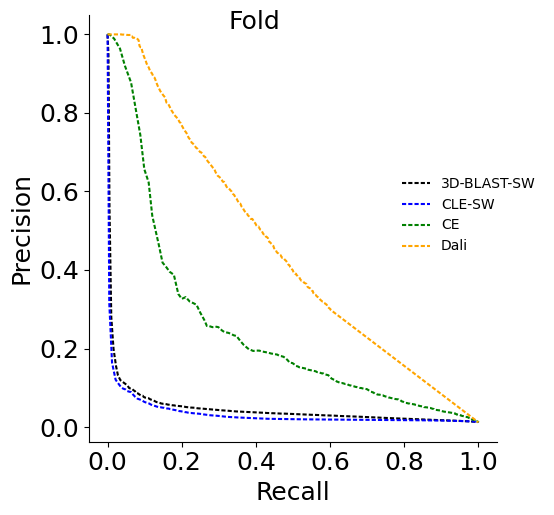

In [5]:
from plmsearch.plmsearch_util.statistics_util import scop_roc, scop_pr

methods_name_list = ["3D-BLAST-SW", "CLE-SW", "CE", "Dali"]
line_style = [(2,1), (2,1), (2,1), (2,1)]
color_dict = {
    "3D-BLAST-SW": "black",
    "CLE-SW": "blue",
    "CE": "green",
    "Dali": "orange",
}

alnresult_dir = "./plmsearch_data/scope_test/rocx/"
methods_filename_list = ["3dblastsw.rocx", "clesw.rocx", "cealn.rocx", "dalialn.rocx"]
scop_roc(alnresult_dir, methods_filename_list, methods_name_list, line_style, color_dict)

alnresult_dir = "./plmsearch_data/scope_test/prx/"
methods_filename_list = ["3dblastsw.prx", "clesw.prx", "cealn.prx", "dalialn.prx"]
scop_pr(alnresult_dir, methods_filename_list, methods_name_list, line_style, color_dict)

Get search list without self: 4859508it [00:26, 180626.41it/s]
100%|██████████| 4857305/4857305 [00:03<00:00, 1563470.17it/s]


MAP of 3D-BLAST-SW:0.4464819354162413
P@1 of 3D-BLAST-SW:0.8251019483461712
P@10 of 3D-BLAST-SW:0.6049841413683733


Get search list without self: 4870413it [00:27, 174046.46it/s]
100%|██████████| 4868206/4868206 [00:03<00:00, 1422857.16it/s]


MAP of CLE-SW:0.44042703425762253
P@1 of CLE-SW:0.8142274580879021
P@10 of CLE-SW:0.5924784775713635


Get search list without self: 4870849it [00:30, 161611.67it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1471389.73it/s]


MAP of CE:0.618318981310886
P@1 of CE:0.8975985500679655
P@10 of CE:0.7344811961939283


Get search list without self: 236029it [00:01, 168974.57it/s]
100%|██████████| 233827/233827 [00:00<00:00, 1364170.21it/s]


MAP of Dali:0.7024833943410841
P@1 of Dali:0.927956502038967
P@10 of Dali:0.7903488898957866


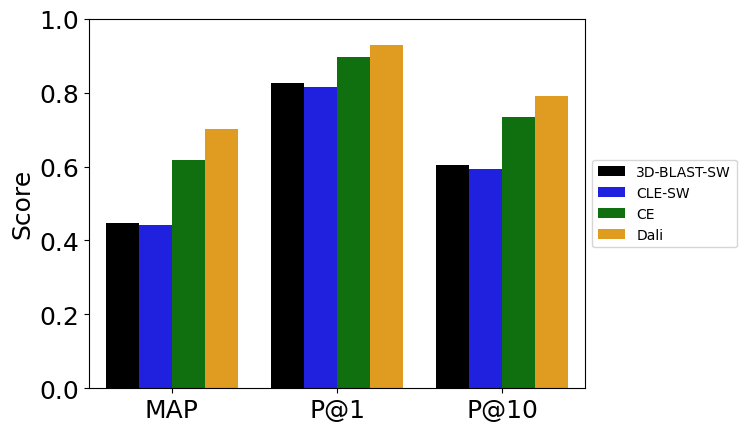

############# Experiment on new proteins #############
Total count of new proteins: 110


Get search list without self: 4859508it [00:27, 175183.63it/s]
100%|██████████| 4857305/4857305 [00:03<00:00, 1445354.03it/s]


MAP of 3D-BLAST-SW:0.3833209117851395
P@1 of 3D-BLAST-SW:0.7636363636363637
P@10 of 3D-BLAST-SW:0.5800000000000001


Get search list without self: 4870413it [00:28, 167967.83it/s]
100%|██████████| 4868206/4868206 [00:03<00:00, 1422791.03it/s]


MAP of CLE-SW:0.39232059970077754
P@1 of CLE-SW:0.7818181818181819
P@10 of CLE-SW:0.5718181818181819


Get search list without self: 4870849it [00:30, 159482.50it/s]
100%|██████████| 4868642/4868642 [00:03<00:00, 1469936.15it/s]


MAP of CE:0.5802374845592765
P@1 of CE:0.8454545454545455
P@10 of CE:0.7227272727272729


Get search list without self: 236029it [00:01, 175483.10it/s]
100%|██████████| 233827/233827 [00:00<00:00, 1378586.39it/s]


MAP of Dali:0.6437328707840312
P@1 of Dali:0.9090909090909091
P@10 of Dali:0.8045454545454546


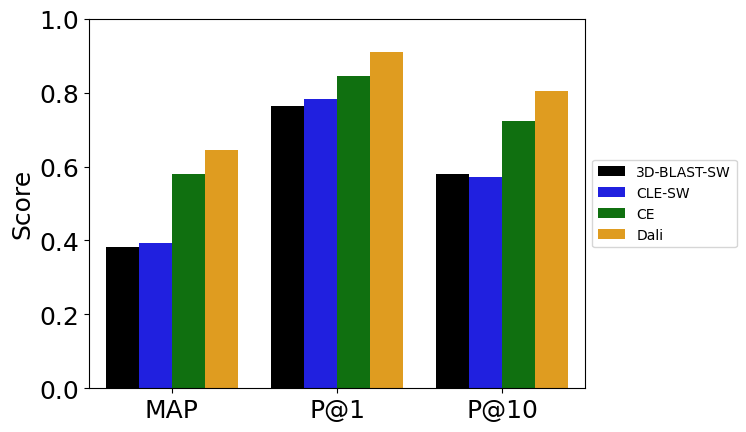

In [6]:
import json
from plmsearch.plmsearch_util.statistics_util import get_input_output, map_pk, map_pk_plot

todo_name_list = [
    "3dblastsw",
    "clesw",
    "cealn",
    "dalialn"
]
color_dict = {
    "3D-BLAST-SW": "black",
    "CLE-SW": "blue",
    "CE": "green",
    "Dali": "orange"
}
method_list = ["3D-BLAST-SW", "CLE-SW", "CE", "Dali"]

todo_dir_list = ["./plmsearch_data/scope_test/search_result/"]
same_fold_mat = "./plmsearch_data/scope_test/same_fold_mat.npy"
query_protein_fasta_path = "./plmsearch_data/scope_test/protein.fasta"
target_protein_fasta_path = "./plmsearch_data/scope_test/protein.fasta"
todo_file_list, _ = get_input_output(todo_dir_list, todo_name_list)
k_list = [1,10]

# All query protein
df_dict_1 = map_pk(same_fold_mat, query_protein_fasta_path, target_protein_fasta_path, todo_file_list, method_list, k_list)
map_pk_plot(df_dict_1, color_dict, legend=True)

# New query protein (without pfam result)
special_protein_list = []
with open("./plmsearch_data/scope_test/pfam_result.json", 'r') as pfam_json_f:
    pfam_result = json.load(pfam_json_f)

for protein_id, pfam_data in pfam_result.items():
    if not pfam_data:
        special_protein_list.append(protein_id)
print(f"############# Experiment on new proteins #############")
print(f"Total count of new proteins: {len(special_protein_list)}")
df_dict_2 = map_pk(same_fold_mat, query_protein_fasta_path, target_protein_fasta_path, todo_file_list, method_list, k_list, special_protein_list=special_protein_list)
map_pk_plot(df_dict_2, color_dict, legend=True)

## Different settings of methods (Foldseek, MMseqs2, TM-align)

In [7]:
%%bash
cd ./plmsearch_data/scope_test/
# Generate rocx
methods=("mmseqs2_default" "mmseqs2" "foldseek_default" "foldseek" "foldseek_tm" "tmaln_default" "tmaln_avg_score" "tmaln")

for method in "${methods[@]}"; do
    echo "Processing method: $method"
    ### The area under the curve (AUC) of the cumulative ROC curve up to the first FP
    awk '{ famsum+=$3; supfamsum+=$4; foldsum+=$5}END{print famsum/NR,supfamsum/NR,foldsum/NR}' ./rocx/${method}.rocx
    ### The average num of Family TPs, Superfamily TPs, Fold TPs, total TPs up to the first FP
    awk '{ FamTP+=$10; SFamTP+=$11; FoldTP+=$12; TP+=$10; TP+=$11; TP+=$12}END{print FamTP/NR, SFamTP/NR, FoldTP/NR, TP/NR}' ./rocx/${method}.rocx
done
cd ../..

Processing method: mmseqs2_default
0.157413 0.0216475 1.08648e-05
0.861799 0.135593 0 0.997392
Processing method: mmseqs2
0.318421 0.0507028 0.00292006
2.206 0.516297 0.0247718 2.74707
Processing method: foldseek_default
0.883598 0.584277 0.213936
8.57366 28.3299 14.1851 51.0887
Processing method: foldseek
0.883598 0.584344 0.214083
8.57366 28.3364 14.1917 51.1017
Processing method: foldseek_tm
0.898516 0.66496 0.296947
8.68709 34.6258 20.7979 64.1108
Processing method: tmaln_default
0.859197 0.529836 0.158013
8.40156 22.4889 8.27119 39.1617
Processing method: tmaln_avg_score
0.933349 0.711424 0.326272
9.26336 37.5293 23.292 70.0847
Processing method: tmaln
0.9355 0.721375 0.346205
9.29726 38.5776 24.8318 72.7066
